In [83]:
import os

# Set the environment variable
os.environ['DATA_DIRECTORY'] = '/Users/liamk/research-project-erc20-governance/data'

# Now you can access it
path = os.environ['DATA_DIRECTORY']
print(f"The data directory is set to: {path}")

The data directory is set to: /Users/liamk/research-project-erc20-governance/data


In [134]:
import pandas as pd
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()  

# Set the base data directory path from environment variable
data_directory = os.environ.get('DATA_DIRECTORY')

# Verify if the DATA_DIRECTORY environment variable is set
if not data_directory:
    raise EnvironmentError("DATA_DIRECTORY environment variable is not set.")

# Define file paths
snapshot_file_path = os.path.join(data_directory, 'snapshot_selection.csv')
token_file_path = os.path.join(data_directory, 'final_token_selection.csv')

# Check if the files exist
if not os.path.exists(snapshot_file_path):
    print(f"File does not exist: {snapshot_file_path}")
else:
    print(f"File exists: {snapshot_file_path}")

if not os.path.exists(token_file_path):
    print(f"File does not exist: {token_file_path}")
else:
    print(f"File exists: {token_file_path}")

# Read the snapshot selection CSV file
try:
    df_snapshots = pd.read_csv(snapshot_file_path)
    df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format
    print("Snapshot selection file loaded successfully. Here are the first few rows:")
    print(df_snapshots.head())
except Exception as e:
    print(f"Error reading snapshot selection file: {e}")

# Read the final token selection CSV file
try:
    df_tokens = pd.read_csv(token_file_path)
    print("Final token selection file loaded successfully. Here are the first few rows:")
    print(df_tokens.head())
except Exception as e:
    print(f"Error reading final token selection file: {e}")

# Convert DataFrame to a dictionary where keys are addresses and values are symbols
try:
    address_to_symbol = pd.Series(df_tokens['symbol'].values, index=df_tokens['address']).to_dict()
    print("Address to symbol dictionary created successfully.")
    print(list(address_to_symbol.items())[:5])  # Print the first 5 items
except Exception as e:
    print(f"Error creating address to symbol dictionary: {e}")

# Known burner addresses
known_burner_addresses = [
    '0x0000000000000000000000000000000000000000',
    '0x0000000000000000000000000000000000000001',
    '0x0000000000000000000000000000000000000002',
    '0x0000000000000000000000000000000000000003',
    '0x0000000000000000000000000000000000000004',
    '0x0000000000000000000000000000000000000005',
    '0x0000000000000000000000000000000000000006',
    '0x0000000000000000000000000000000000000007',
    '0x000000000000000000000000000000000000dead'
]

print("Known burner addresses list:")
print(known_burner_addresses)

File exists: /Users/liamk/research-project-erc20-governance/data/snapshot_selection.csv
File exists: /Users/liamk/research-project-erc20-governance/data/final_token_selection.csv
Snapshot selection file loaded successfully. Here are the first few rows:
   Nr.  Block Height       Date
0    1       7962629 2019-06-15
1    2       8155117 2019-07-15
2    3       8354625 2019-08-15
3    4       8553607 2019-09-15
4    5       8745378 2019-10-15
Final token selection file loaded successfully. Here are the first few rows:
      coingecko_id     name    VL    MC  \
0          uniswap  Uniswap  True  True   
1             aave     Aave  True  True   
2         lido-dao     Lido  True  True   
3            maker    Maker  True  True   
4  curve-dao-token    Curve  True  True   

                                      address symbol  
0  0x1f9840a85d5af5bf1d1762f925bdaddc4201f984    UNI  
1  0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9   AAVE  
2  0x5a98fcbea516cf06857215779fd812ca3bef1b32    LDO  

In [135]:
import sys

current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

from src.analysis.clique_analysis import * 
from src.visualisations.wallet_network_projections_visualisations import * 

In [136]:
import networkx as nx
from dotenv import load_dotenv

# Load environment variables from .env file (if needed for other variables)
load_dotenv()

# Set the input directory directly to the local folder where the graphs are stored
input_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

# Check if the input directory exists
if not os.path.exists(input_directory):
    raise FileNotFoundError(f"Input directory does not exist: {input_directory}")

print(f"Input directory is set to: {input_directory}")

# Function to load graphs from snapshots
def load_wallet_graphs_from_snapshots(df_snapshots, input_directory):
    graphs = {}
    dates = {}
    
    for index, row in df_snapshots.iterrows():
        snapshot = row['Block Height']
        date = row['Date'].strftime('%Y-%m-%d')  # Format date as string
        dates[snapshot] = date
        file_path = os.path.join(input_directory, f"validated_wallet_projection_graph_{snapshot}.graphml")
        
        print(f"Checking file: {file_path}")  # Debug print

        if os.path.exists(file_path):
            graph = nx.read_graphml(file_path)
            graphs[snapshot] = graph
            print(f"Loaded graph for snapshot {snapshot}")
        else:
            print(f"Graph file for snapshot {snapshot} does not exist at {file_path}")
    
    return graphs, dates

# Assuming df_snapshots is already loaded
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
df_snapshots = pd.read_csv(os.path.join(data_directory, 'snapshot_selection.csv'))
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format

# Load the graphs
graphs, dates = load_wallet_graphs_from_snapshots(df_snapshots, input_directory)

# Print the loaded graphs for verification
print(f"Loaded {len(graphs)} graphs.")
for snapshot, graph in graphs.items():
    print(f"Snapshot: {snapshot}, Number of nodes: {len(graph.nodes)}, Number of edges: {len(graph.edges)}")

Input directory is set to: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Graph file for snapshot 7962629 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Graph file for snapshot 8155117 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8354625.graphml
Graph file for snapshot 8354625 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_gra

Loaded graph for snapshot 14391029
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_14589816.graphml
Loaded graph for snapshot 14589816
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_14779829.graphml
Loaded graph for snapshot 14779829
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_14967365.graphml
Loaded graph for snapshot 14967365
Loaded 18 graphs.
Snapshot: 11659570, Number of nodes: 118, Number of edges: 883
Snapshot: 11861210, Number of nodes: 114, Number of edges: 817
Snapshot: 12043054, Number of nodes: 116, Number of edges: 864
Snapshot: 12244515, Number of nodes: 114, Number of edges: 831
Snapshot: 12438842, Number of nodes: 119, Number of edges: 852
Snapshot: 12638919, Number of nodes: 130, Number of edges: 890
Snapshot: 12831436, Number of nodes: 1

# Tracking communities accross time using Lovain method and giving community Labels

In [137]:

input_directory = os.path.join(path, '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs')
graphs, dates = load_wallet_graphs_from_snapshots(df_snapshots, input_directory)

Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Graph file for snapshot 7962629 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Graph file for snapshot 8155117 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8354625.graphml
Graph file for snapshot 8354625 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8354625.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTOR

Loaded graph for snapshot 14779829
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_14967365.graphml
Loaded graph for snapshot 14967365


In [138]:
import os
from os.path import join
from dotenv import load_dotenv
import dask.dataframe as dd
from tqdm import tqdm
import pandas as pd
import time
import numpy as np
import networkx as nx

from src.wallet_projection.wallet_projection_analysis import validate_wallet_links  # Adjust the import if necessary

load_dotenv()

path = os.environ['DATA_DIRECTORY']

# Constants
SNAPSHOT_CSV_PATH = '/Users/liamk/Desktop/DATA_DIRECTORY/data/snapshot_selection.csv'
ADDRESS_CSV_PATH = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
OUTPUT_PATH = join(path, '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs')
SUPPLY_THRESHOLD = 0.01 # 0.01  equal 1% of token supply

In [139]:
# Constants
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
snapshot_directory = join(data_directory, 'snapshot_token_balance_tables')
output_directory = join(data_directory, 'validated_wallet_projection_graphs')
token_csv_path = join(data_directory, 'final_token_selection.csv')
snapshot_csv_path = join(data_directory, 'snapshot_selection.csv')


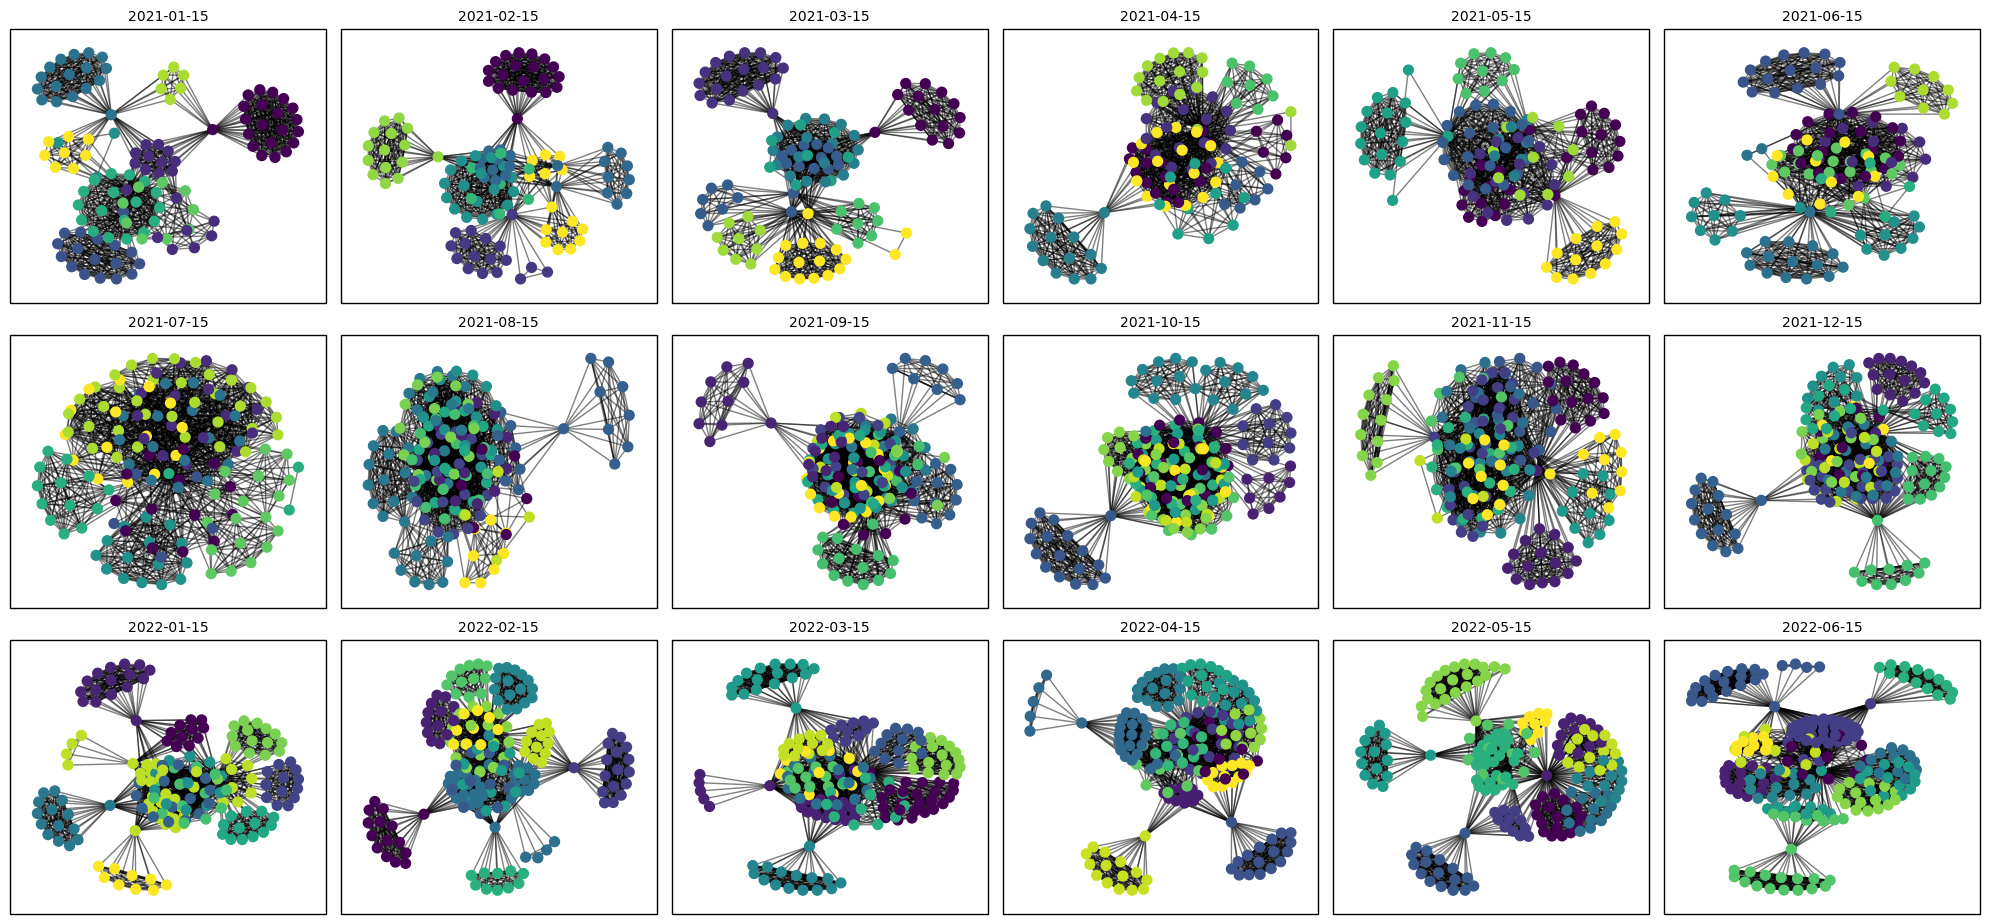

In [140]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import community as community_louvain

def visualize_wallet_network_grid(graphs, dates, output_directory, layout=nx.kamada_kawai_layout):
    # Define the grid size
    rows, cols = 3, 6  # Adjust based on the number of graphs
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    axes = axes.flatten()  # Flatten to iterate easily

    for ax, (snapshot, graph) in zip(axes, graphs.items()):
        # Perform community detection
        partition = community_louvain.best_partition(graph)

        # Compute layout
        pos = layout(graph)

        # Draw the graph with communities as detected
        nx.draw_networkx_nodes(graph, pos, node_size=50, cmap=plt.get_cmap('viridis'),
                               node_color=list(partition.values()), ax=ax)
        nx.draw_networkx_edges(graph, pos, alpha=0.5, ax=ax)
        ax.set_title(dates[snapshot], fontsize=10)
        ax.set_axis_off()  # Hide axis for clarity

        # Draw a rectangle around the plot area
        rect = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='black', facecolor='none', transform=ax.transAxes, clip_on=False)
        ax.add_patch(rect)

    # Turn off any unused subplots
    for i in range(len(graphs), len(axes)):
        axes[i].set_axis_off()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust the top spacing to accommodate title if necessary
    plt.savefig(os.path.join(output_directory, 'wallet_network_grid.png'))
    plt.show()

# Visualize the wallet network grid
visualize_wallet_network_grid(graphs, dates, output_directory)




In [91]:
import networkx as nx
import pandas as pd

def calculate_graph_statistics(graphs_dict):
    data = {
        'Snapshot': [],
        'Nodes': [],
        'Edges': [],
        'Density': [],
        'AvgDegree': [],
        'NumComponents': [],
        'SizeLargestComponent': [],
        'AvgClusteringCoeff': [],

    }

    for snapshot, G in graphs_dict.items():
        num_nodes = len(G.nodes())
        num_edges = len(G.edges())
        density = nx.density(G)
        avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
        num_components = nx.number_connected_components(G)
        largest_component = max(nx.connected_components(G), key=len)
        size_largest_component = len(largest_component)
        avg_clustering = nx.average_clustering(G)
        
        
        data['Snapshot'].append(snapshot)
        data['Nodes'].append(num_nodes)
        data['Edges'].append(num_edges)
        data['Density'].append(density)
        data['AvgDegree'].append(avg_degree)
        data['NumComponents'].append(num_components)
        data['SizeLargestComponent'].append(size_largest_component)
        data['AvgClusteringCoeff'].append(avg_clustering)

    
    return pd.DataFrame(data)

# Example usage
# Assuming `graphs` is a dictionary of NetworkX graphs
graph_stats = calculate_graph_statistics(graphs)

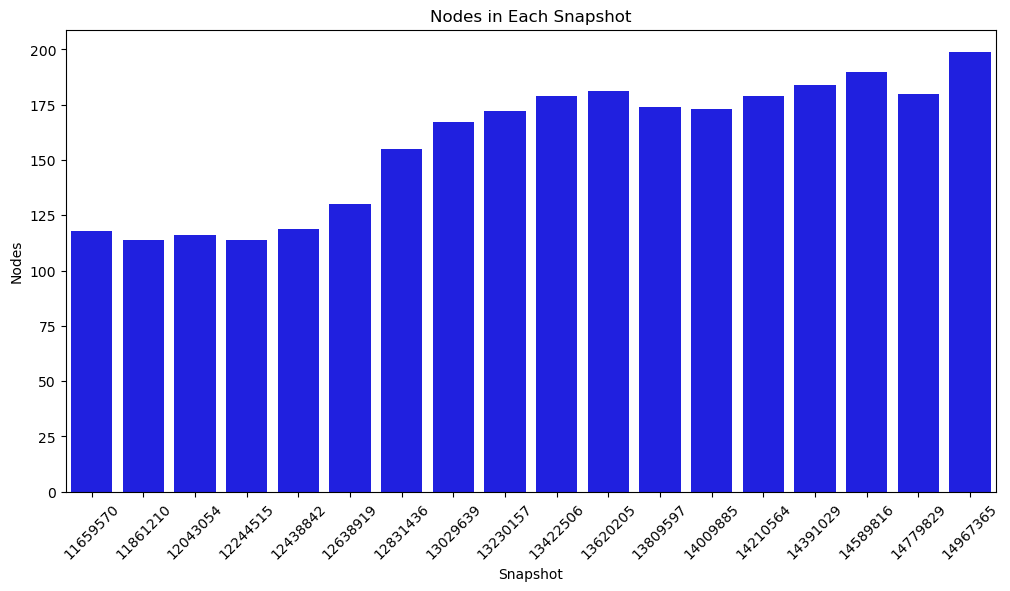

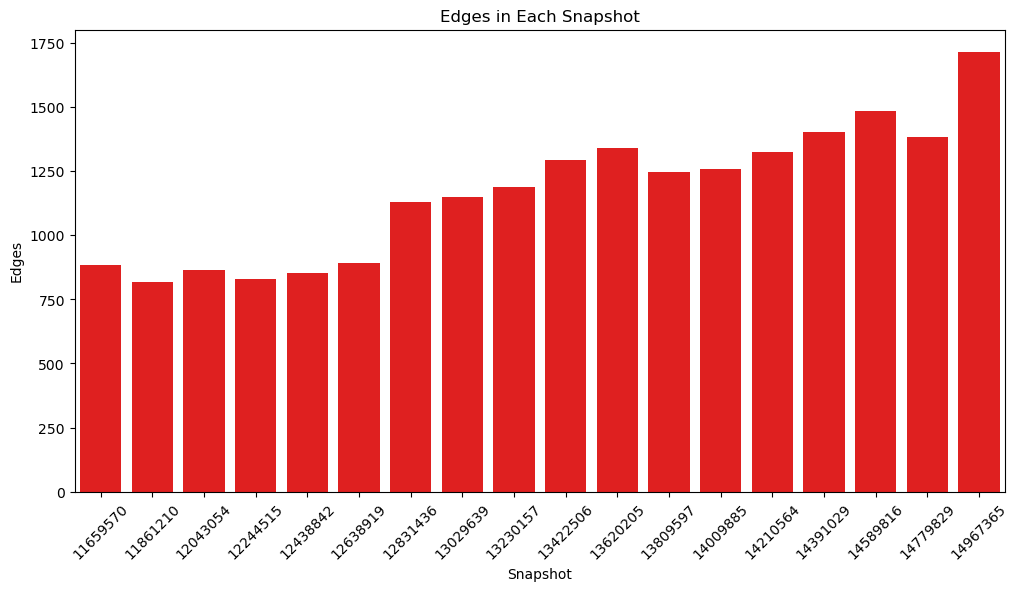

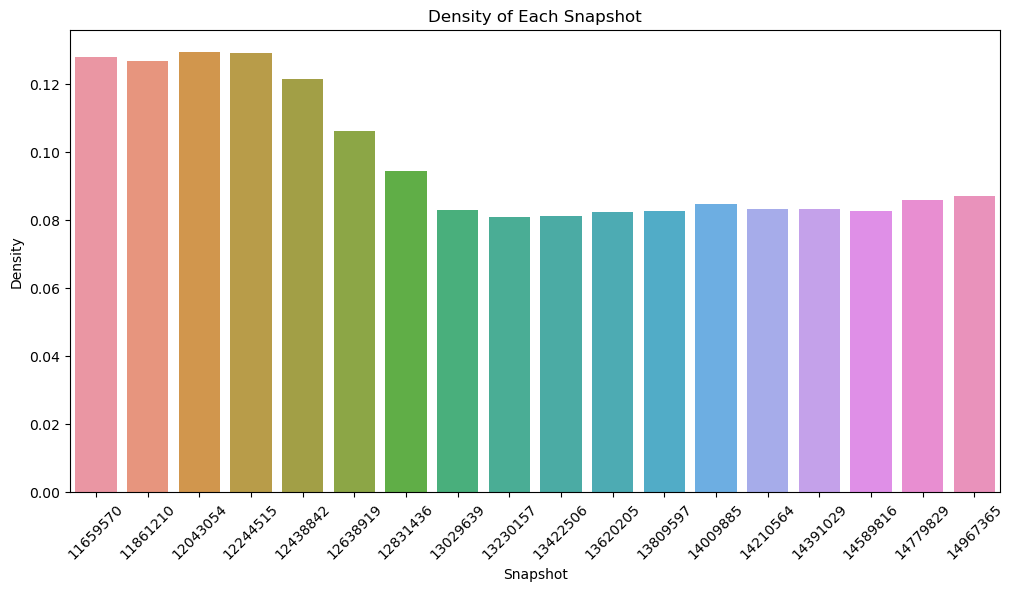

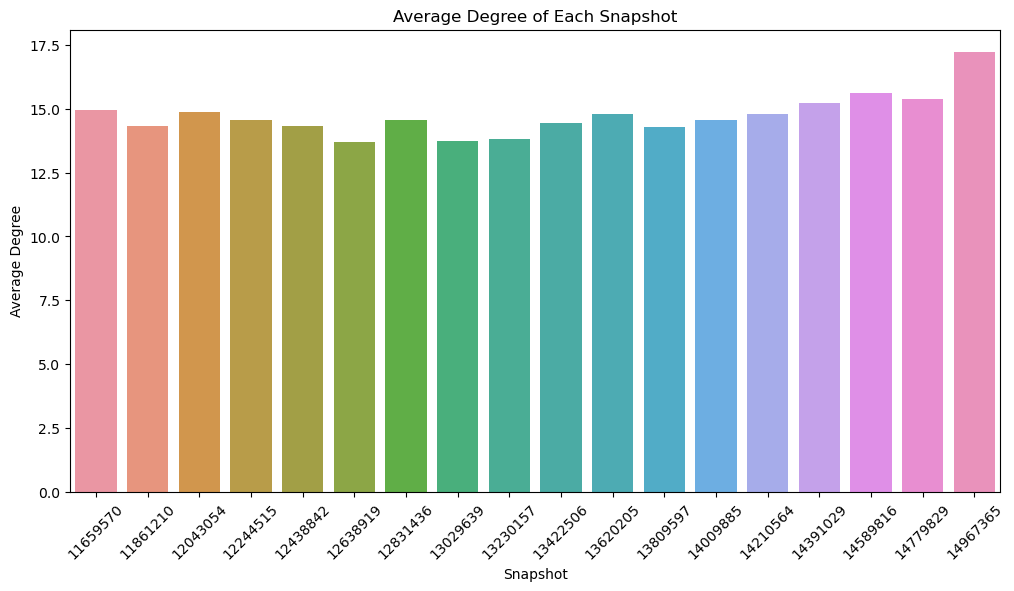

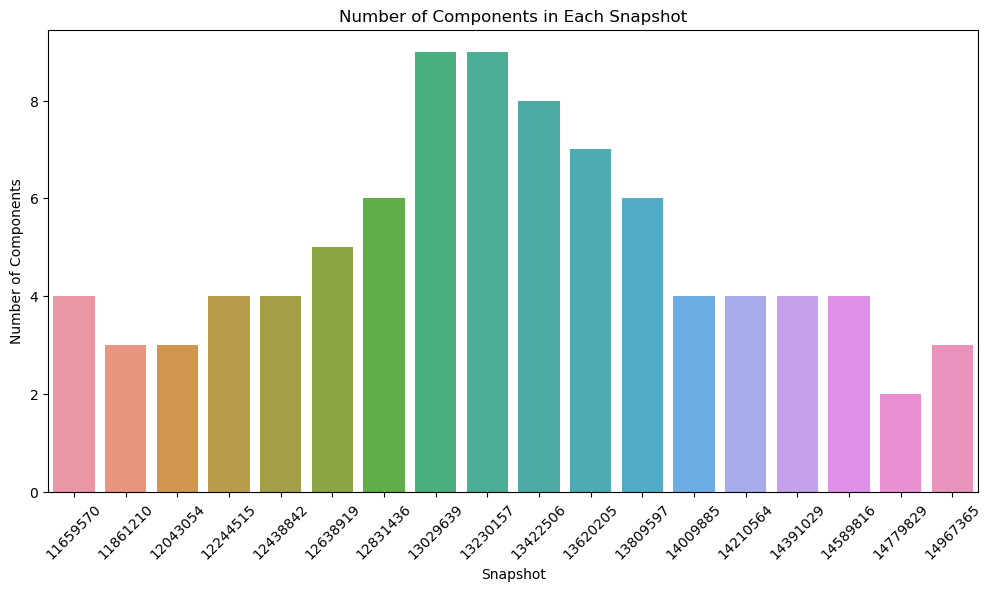

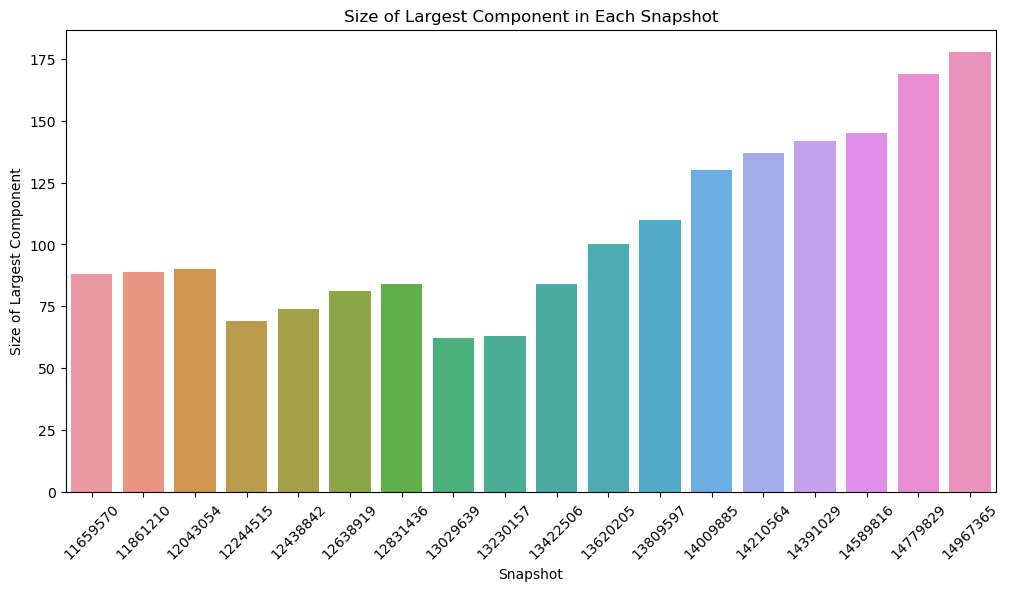

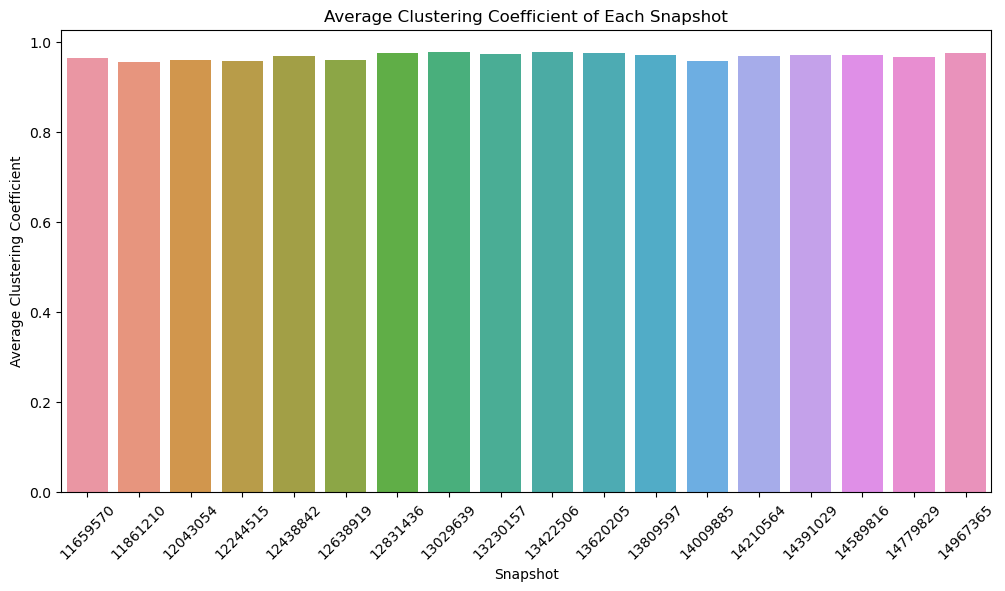

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting Nodes
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='Nodes', data=graph_stats, color='b')
plt.title('Nodes in Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Nodes')
plt.xticks(rotation=45)
plt.show()

# Plotting Edges
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='Edges', data=graph_stats, color='r')
plt.title('Edges in Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Edges')
plt.xticks(rotation=45)
plt.show()

# Plotting Density
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='Density', data=graph_stats)
plt.title('Density of Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.show()

# Plotting Average Degree
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='AvgDegree', data=graph_stats)
plt.title('Average Degree of Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Average Degree')
plt.xticks(rotation=45)
plt.show()

# Plotting Number of Components
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='NumComponents', data=graph_stats)
plt.title('Number of Components in Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Number of Components')
plt.xticks(rotation=45)
plt.show()

# Plotting Size of Largest Component
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='SizeLargestComponent', data=graph_stats)
plt.title('Size of Largest Component in Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Size of Largest Component')
plt.xticks(rotation=45)
plt.show()

# Plotting Average Clustering Coefficient
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='AvgClusteringCoeff', data=graph_stats)
plt.title('Average Clustering Coefficient of Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Average Clustering Coefficient')
plt.xticks(rotation=45)
plt.show()

# Token distribution statistics

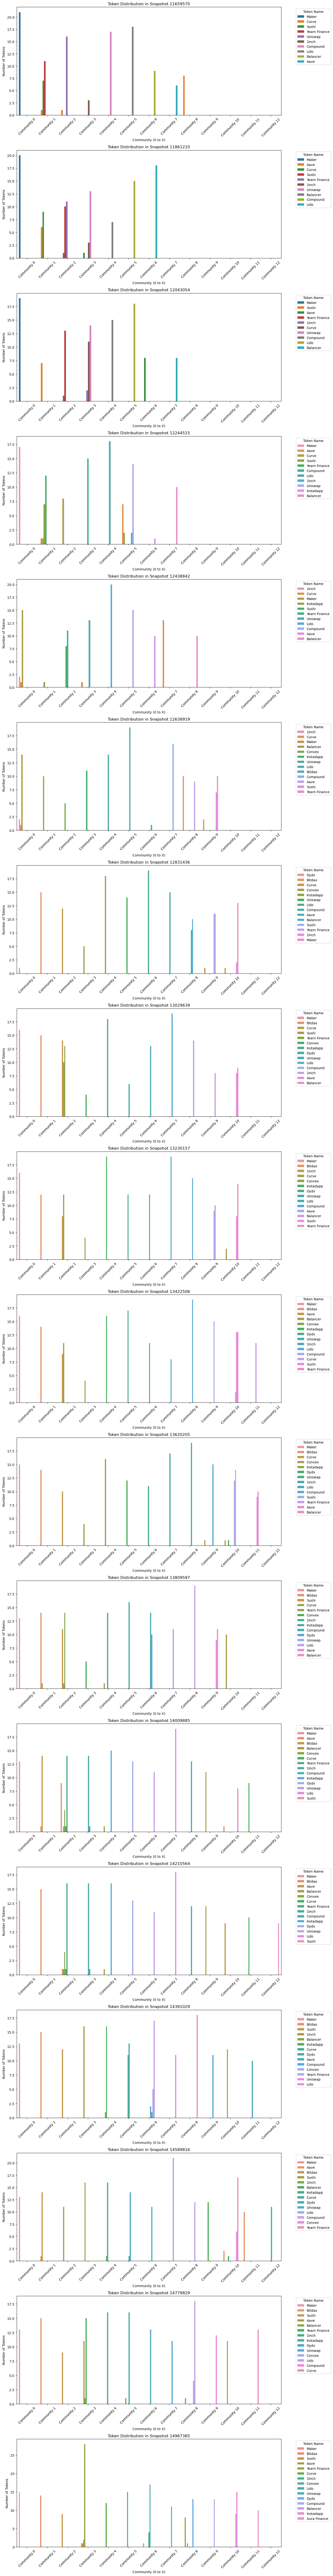

In [133]:
import os
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
from collections import defaultdict
import community as community_louvain

def generate_token_name_statistics(graph_directory, token_info_path):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    community_token_stats = []
    previous_communities = None

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Set the community labels in the graph
            nx.set_node_attributes(G, partition, 'community')

            # Compile token statistics per community
            community_stats = defaultdict(lambda: defaultdict(int))
            for node, data in G.nodes(data=True):
                community = data['community']
                token_address = data.get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')
                community_stats[community][token_name] += 1

            # Format data for this graph into a list of dictionaries
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for community, tokens in community_stats.items():
                for token_name, count in tokens.items():
                    community_token_stats.append({
                        'Snapshot': snapshot_time,
                        'Community': community,
                        'Token Name': token_name,
                        'Count': count
                    })

            # Update previous_communities for the next iteration
            previous_communities = partition

    # Convert to DataFrame for better display and analysis
    return pd.DataFrame(community_token_stats)

def visualize_token_statistics_over_time(community_token_stats):
    # Ensure that the DataFrame has the correct data types
    community_token_stats['Count'] = community_token_stats['Count'].astype(int)
    community_token_stats['Community'] = community_token_stats['Community'].astype(int)

    # Determine the full range of communities to ensure all labels are included
    all_communities = sorted(community_token_stats['Community'].unique())

    # Add missing communities with zero counts to ensure consistent spacing
    complete_stats = []
    for snapshot in community_token_stats['Snapshot'].unique():
        for community in all_communities:
            snapshot_data = community_token_stats[(community_token_stats['Snapshot'] == snapshot) &
                                                  (community_token_stats['Community'] == community)]
            if snapshot_data.empty:
                complete_stats.append({
                    'Snapshot': snapshot,
                    'Community': community,
                    'Token Name': None,
                    'Count': 0
                })
            else:
                complete_stats.extend(snapshot_data.to_dict('records'))

    complete_stats_df = pd.DataFrame(complete_stats)

    # Sort the DataFrame to ensure consistent order by Community and Snapshot
    complete_stats_df.sort_values(by=['Snapshot', 'Community', 'Token Name'], inplace=True)

    # Set up the grid of plots, one per snapshot
    snapshots = complete_stats_df['Snapshot'].unique()
    num_snapshots = len(snapshots)
    fig, axes = plt.subplots(num_snapshots, 1, figsize=(14, 6 * num_snapshots))

    if num_snapshots == 1:
        axes = [axes]  # Ensure axes is iterable

    for i, snapshot in enumerate(snapshots):
        snapshot_data = complete_stats_df[complete_stats_df['Snapshot'] == snapshot]

        # Plot the data with all communities explicitly listed on the X-axis
        sns.barplot(data=snapshot_data, x='Community', y='Count', hue='Token Name', ax=axes[i], order=all_communities)

        # Ensure the X-axis includes all community labels from 0 to X
        axes[i].set_xticks(range(len(all_communities)))
        axes[i].set_xticklabels([f"Community {community}" for community in all_communities])

        # Improve labeling and position tokens to the left of the community names
        axes[i].set_title(f'Token Distribution in Snapshot {snapshot}')
        axes[i].set_xlabel('Community (0 to X)')
        axes[i].set_ylabel('Number of Tokens')
        axes[i].legend(title='Token Name', bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[i].tick_params(axis='x', rotation=45)

        # Adjust the layout to avoid overlap and ensure clarity
        plt.subplots_adjust(right=0.85)

    plt.tight_layout()
    plt.show()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Generate token name statistics
community_token_name_stats = generate_token_name_statistics(graph_directory, token_info_path)

# Visualize the token statistics over time
visualize_token_statistics_over_time(community_token_name_stats)



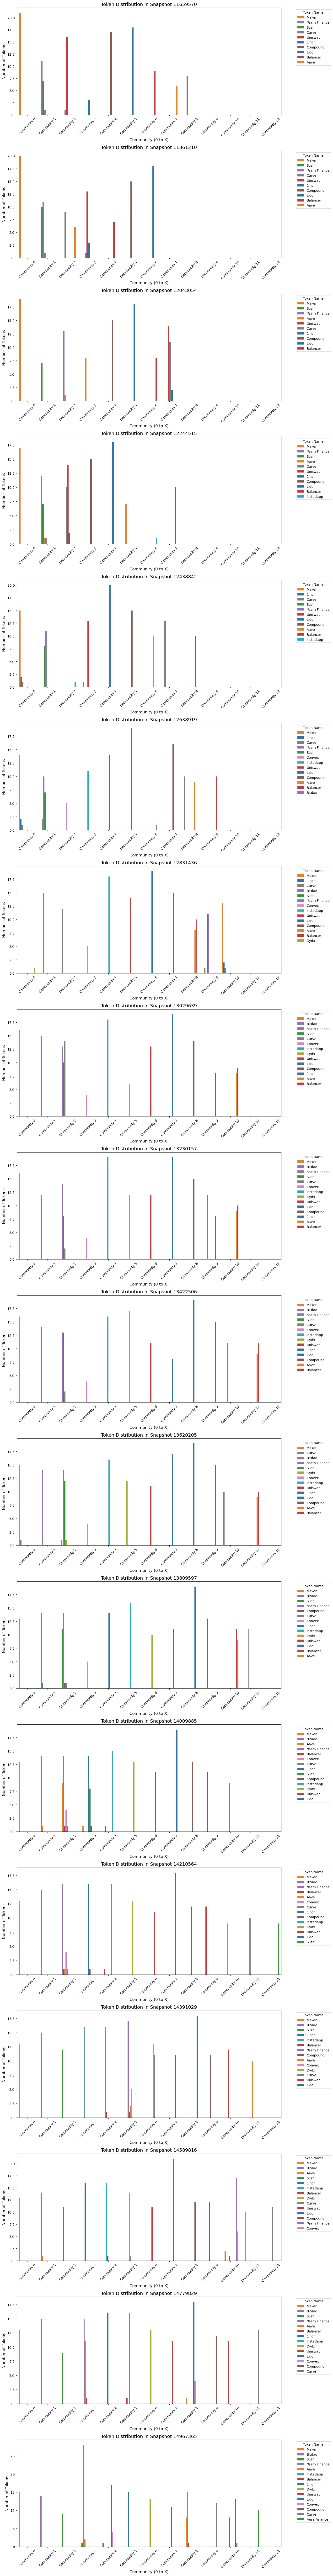

In [121]:
import os
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
from collections import defaultdict

def generate_token_name_statistics(graph_directory, token_info_path):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    community_token_stats = []
    previous_communities = None

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Set the community labels in the graph
            nx.set_node_attributes(G, partition, 'community')

            # Compile token statistics per community
            community_stats = defaultdict(lambda: defaultdict(int))
            for node, data in G.nodes(data=True):
                community = data['community']
                token_address = data.get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')
                community_stats[community][token_name] += 1

            # Format data for this graph into a list of dictionaries
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for community, tokens in community_stats.items():
                for token_name, count in tokens.items():
                    community_token_stats.append({
                        'Snapshot': snapshot_time,
                        'Community': community,
                        'Token Name': token_name,
                        'Count': count
                    })

            # Update previous_communities for the next iteration
            previous_communities = partition

    # Convert to DataFrame for better display and analysis
    return pd.DataFrame(community_token_stats)

def visualize_token_statistics_over_time(community_token_stats):
    # Ensure that the DataFrame has the correct data types
    community_token_stats['Count'] = community_token_stats['Count'].astype(int)
    community_token_stats['Community'] = community_token_stats['Community'].astype(int)

    # Define a consistent color palette for tokens
    unique_tokens = sorted(community_token_stats['Token Name'].unique())
    palette = sns.color_palette("tab10", len(unique_tokens))
    token_palette = dict(zip(unique_tokens, palette))

    # Get all unique community labels
    all_communities = sorted(community_token_stats['Community'].unique())

    # Set up the grid of plots, one per snapshot
    snapshots = community_token_stats['Snapshot'].unique()
    num_snapshots = len(snapshots)
    fig, axes = plt.subplots(num_snapshots, 1, figsize=(14, 6 * num_snapshots))

    if num_snapshots == 1:
        axes = [axes]  # Ensure axes is iterable

    for i, snapshot in enumerate(snapshots):
        snapshot_data = community_token_stats[community_token_stats['Snapshot'] == snapshot]

        sns.barplot(data=snapshot_data, x='Community', y='Count', hue='Token Name', ax=axes[i], 
                    palette=token_palette, order=all_communities)

        # Set the x-ticks to be the community labels centered under the bars
        axes[i].set_xticks(range(len(all_communities)))
        axes[i].set_xticklabels([f"Community {community}" for community in all_communities], fontsize=10)

        # Improve labeling
        axes[i].set_title(f'Token Distribution in Snapshot {snapshot}', fontsize=14)
        axes[i].set_xlabel('Community (0 to X)', fontsize=12)
        axes[i].set_ylabel('Number of Tokens', fontsize=12)
        axes[i].legend(title='Token Name', bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[i].tick_params(axis='x', rotation=45)

        # Adjust the layout to prevent overlap
        plt.subplots_adjust(right=0.85)

    plt.tight_layout()
    plt.show()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Generate token name statistics
community_token_name_stats = generate_token_name_statistics(graph_directory, token_info_path)

# Visualize the token statistics over time
visualize_token_statistics_over_time(community_token_name_stats)


In [122]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def generate_detailed_statistics(graph_directory, token_info_path):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    # Data structures to hold statistics
    wallet_stats = defaultdict(lambda: defaultdict(int))
    token_stats = defaultdict(int)
    community_stats = defaultdict(lambda: defaultdict(int))

    previous_communities = None  # No global community mapping

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Directly use the partition without global mapping or matching communities
            nx.set_node_attributes(G, partition, 'community')

            # Collect statistics
            for node, data in G.nodes(data=True):
                wallet = node
                community = data['community']
                token_address = data.get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')

                # Update wallet statistics
                wallet_stats[wallet]['Community'] = community
                wallet_stats[wallet][token_name] += 1

                # Update token statistics
                token_stats[token_name] += 1

                # Update community statistics
                community_stats[community]['Size'] += 1
                community_stats[community][token_name] += 1

            # Update previous_communities for the next iteration
            previous_communities = partition  # Update directly with the partition

    # Convert statistics to DataFrames for better analysis
    wallet_df = pd.DataFrame(wallet_stats).T.reset_index().rename(columns={'index': 'Wallet'})
    token_df = pd.DataFrame(list(token_stats.items()), columns=['Token Name', 'Count'])
    community_df = pd.DataFrame(community_stats).T.reset_index().rename(columns={'index': 'Community'})

    return wallet_df, token_df, community_df

def save_statistics(wallet_df, token_df, community_df, output_directory):
    wallet_df.to_csv(join(output_directory, 'wallet_statistics.csv'), index=False)
    token_df.to_csv(join(output_directory, 'token_statistics.csv'), index=False)
    community_df.to_csv(join(output_directory, 'community_statistics.csv'), index=False)

    print(f"Statistics saved to {output_directory}")

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')
output_directory = join(data_directory, 'statistics_output')

# Generate detailed statistics
wallet_df, token_df, community_df = generate_detailed_statistics(graph_directory, token_info_path)

# Save the statistics to CSV files
save_statistics(wallet_df, token_df, community_df, output_directory)


Statistics saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output


In [123]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def generate_detailed_statistics_by_snapshot(graph_directory, token_info_path):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    previous_communities = None  # Removed global_community_map

    all_snapshot_stats = {}

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Directly use the partition without global mapping
            nx.set_node_attributes(G, partition, 'community')

            # Initialize data structures to hold statistics for this snapshot
            wallet_stats = defaultdict(lambda: defaultdict(int))
            token_stats = defaultdict(int)
            community_stats = defaultdict(lambda: defaultdict(int))

            # Collect statistics
            for node, data in G.nodes(data=True):
                wallet = node
                community = data['community']
                token_address = data.get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')

                # Update wallet statistics
                wallet_stats[wallet]['Community'] = community
                wallet_stats[wallet][token_name] += 1

                # Update token statistics
                token_stats[token_name] += 1

                # Update community statistics
                community_stats[community]['Size'] += 1
                community_stats[community][token_name] += 1

            # Convert statistics to DataFrames for better analysis
            wallet_df = pd.DataFrame(wallet_stats).T.reset_index().rename(columns={'index': 'Wallet'})
            token_df = pd.DataFrame(list(token_stats.items()), columns=['Token Name', 'Count'])
            community_df = pd.DataFrame(community_stats).T.reset_index().rename(columns={'index': 'Community'})

            # Store the statistics for this snapshot
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            all_snapshot_stats[snapshot_time] = {
                'wallet_df': wallet_df,
                'token_df': token_df,
                'community_df': community_df
            }

            # Update previous_communities for the next iteration
            previous_communities = partition  # Update directly with the partition

    return all_snapshot_stats

def save_snapshot_statistics(all_snapshot_stats, output_directory):
    for snapshot_time, stats in all_snapshot_stats.items():
        wallet_df = stats['wallet_df']
        token_df = stats['token_df']
        community_df = stats['community_df']

        # Save each DataFrame as a CSV file
        wallet_df.to_csv(join(output_directory, f'wallet_statistics_{snapshot_time}.csv'), index=False)
        token_df.to_csv(join(output_directory, f'token_statistics_{snapshot_time}.csv'), index=False)
        community_df.to_csv(join(output_directory, f'community_statistics_{snapshot_time}.csv'), index=False)

        print(f"Statistics for snapshot {snapshot_time} saved to {output_directory}")

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')
output_directory = join(data_directory, 'statistics_output')

# Generate detailed statistics by snapshot
all_snapshot_stats = generate_detailed_statistics_by_snapshot(graph_directory, token_info_path)

# Save the snapshot statistics to CSV files
save_snapshot_statistics(all_snapshot_stats, output_directory)



Statistics for snapshot 11659570 saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output
Statistics for snapshot 11861210 saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output
Statistics for snapshot 12043054 saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output
Statistics for snapshot 12244515 saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output
Statistics for snapshot 12438842 saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output
Statistics for snapshot 12638919 saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output
Statistics for snapshot 12831436 saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output
Statistics for snapshot 13029639 saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output
Statistics for snapshot 13230157 saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output
Statistics for snapshot 13422506 saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statisti

# Overlapping communities

In [124]:
import os
import networkx as nx
from os.path import join
from collections import defaultdict
import pandas as pd
import community as community_louvain

def find_nodes_in_multiple_communities(graph, partition):
    """Identify nodes that belong to multiple communities."""
    # Create a reverse map from community ID to the set of nodes in that community
    community_to_nodes = defaultdict(set)
    node_to_communities = defaultdict(set)
    
    for node, community in partition.items():
        community_to_nodes[community].add(node)
        node_to_communities[node].add(community)
    
    # Identify nodes that belong to multiple communities
    nodes_in_multiple_communities = {node: communities for node, communities in node_to_communities.items() if len(communities) > 1}
    
    return nodes_in_multiple_communities

def track_nodes_in_multiple_communities_over_time(graph_directory, token_info_path):
    # Load the token mapping for reference (not directly used here, but loaded for consistency)
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address

    all_snapshot_multiple_memberships = {}

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Identify nodes belonging to multiple communities
            nodes_in_multiple_communities = find_nodes_in_multiple_communities(G, partition)
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')

            # Store the result for the current snapshot
            all_snapshot_multiple_memberships[snapshot_time] = nodes_in_multiple_communities

    return all_snapshot_multiple_memberships

def save_nodes_in_multiple_communities(all_snapshot_multiple_memberships, output_directory):
    for snapshot_time, nodes_in_multiple_communities in all_snapshot_multiple_memberships.items():
        output_path = join(output_directory, f'nodes_in_multiple_communities_{snapshot_time}.txt')
        with open(output_path, 'w') as f:
            f.write(f"Nodes in Multiple Communities in Snapshot {snapshot_time}\n")
            for node, communities in nodes_in_multiple_communities.items():
                f.write(f"Node {node} belongs to communities: {sorted(communities)}\n")
        print(f"Nodes in multiple communities for snapshot {snapshot_time} saved to {output_path}")

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')
output_directory = join(data_directory, 'statistics_output')

# Track nodes in multiple communities over time
all_snapshot_multiple_memberships = track_nodes_in_multiple_communities_over_time(graph_directory, token_info_path)

# Save the nodes in multiple communities information
save_nodes_in_multiple_communities(all_snapshot_multiple_memberships, output_directory)



Nodes in multiple communities for snapshot 11659570 saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/nodes_in_multiple_communities_11659570.txt
Nodes in multiple communities for snapshot 11861210 saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/nodes_in_multiple_communities_11861210.txt
Nodes in multiple communities for snapshot 12043054 saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/nodes_in_multiple_communities_12043054.txt
Nodes in multiple communities for snapshot 12244515 saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/nodes_in_multiple_communities_12244515.txt
Nodes in multiple communities for snapshot 12438842 saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/nodes_in_multiple_communities_12438842.txt
Nodes in multiple communities for snapshot 12638919 saved to /Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/nodes_in_multiple_communities_12638919.txt
Nodes in multiple comm

# Louvain method doesnt detect overlapping communities

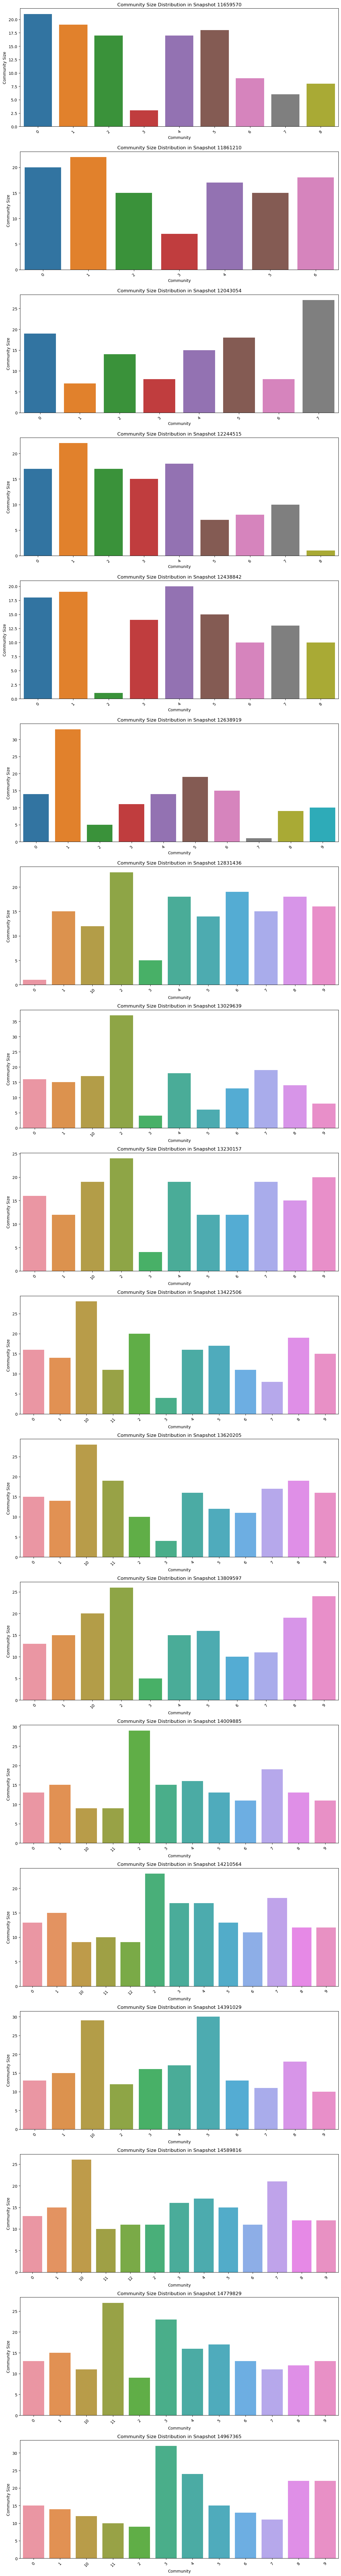

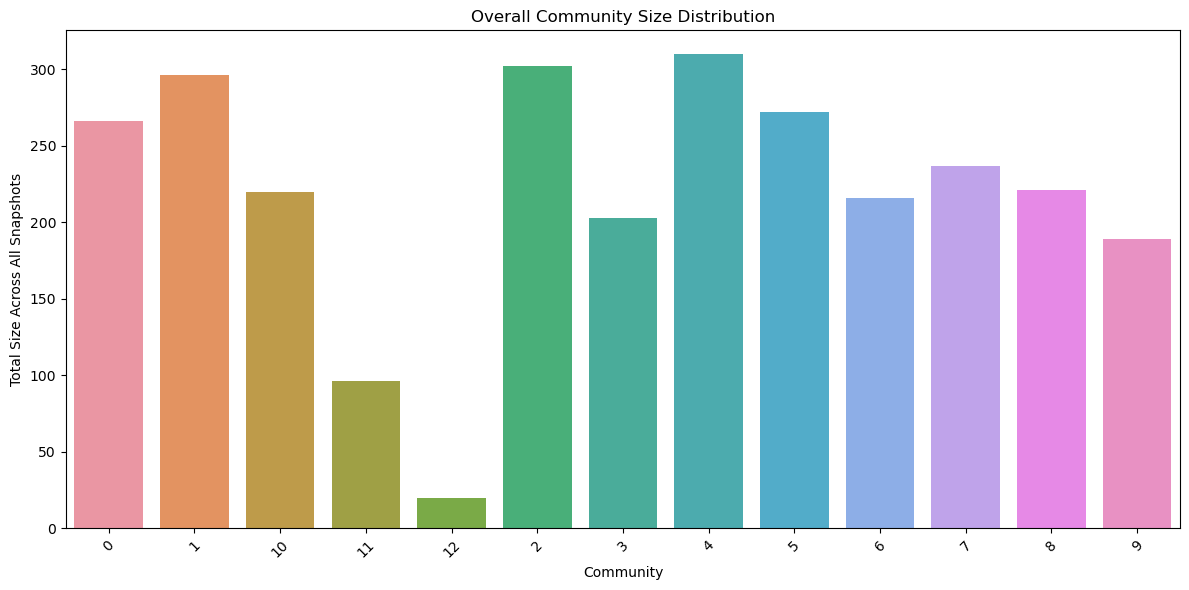

In [125]:
import os
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
from collections import defaultdict

def generate_token_and_community_size_statistics(graph_directory, token_info_path):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    community_token_stats = []
    community_size_stats = []
    previous_communities = None  # Removed global_community_map

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Directly use the partition without global mapping
            nx.set_node_attributes(G, partition, 'community')

            # Compile token statistics per community
            community_stats = defaultdict(lambda: defaultdict(int))
            community_sizes = defaultdict(int)
            for node, data in G.nodes(data=True):
                community = data['community']
                token_address = data.get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')

                community_stats[community][token_name] += 1
                community_sizes[community] += 1

            # Format data for this graph into a list of dictionaries
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for community, tokens in community_stats.items():
                for token_name, count in tokens.items():
                    community_token_stats.append({
                        'Snapshot': snapshot_time,
                        'Community': community,
                        'Token Name': token_name,
                        'Count': count
                    })
            
            for community, size in community_sizes.items():
                community_size_stats.append({
                    'Snapshot': snapshot_time,
                    'Community': community,
                    'Size': size
                })

            # Update previous_communities for the next iteration
            previous_communities = partition  # Update directly with the partition

    # Convert to DataFrames for better display and analysis
    community_token_stats_df = pd.DataFrame(community_token_stats)
    community_size_stats_df = pd.DataFrame(community_size_stats)

    return community_token_stats_df, community_size_stats_df

def visualize_community_size_distribution_over_time(community_size_stats_df):
    # Ensure the DataFrame has the correct data types
    community_size_stats_df['Size'] = community_size_stats_df['Size'].astype(int)
    community_size_stats_df['Community'] = community_size_stats_df['Community'].astype(str)

    # Sort the DataFrame by Community to ensure ascending order
    community_size_stats_df.sort_values(by=['Snapshot', 'Community'], inplace=True)

    # Set up the grid of plots, one per snapshot
    snapshots = community_size_stats_df['Snapshot'].unique()
    num_snapshots = len(snapshots)
    fig, axes = plt.subplots(num_snapshots, 1, figsize=(12, 5 * num_snapshots))

    if num_snapshots == 1:
        axes = [axes]  # Ensure axes is iterable

    for i, snapshot in enumerate(snapshots):
        snapshot_data = community_size_stats_df[community_size_stats_df['Snapshot'] == snapshot]
        sns.barplot(data=snapshot_data, x='Community', y='Size', ax=axes[i], order=sorted(snapshot_data['Community'].unique()))
        axes[i].set_title(f'Community Size Distribution in Snapshot {snapshot}')
        axes[i].set_xlabel('Community')
        axes[i].set_ylabel('Community Size')
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def visualize_overall_community_size_distribution(community_size_stats_df):
    # Combine all snapshots for an overall distribution
    overall_distribution = community_size_stats_df.groupby('Community')['Size'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=overall_distribution, x='Community', y='Size', order=sorted(overall_distribution['Community'].unique()))
    plt.title('Overall Community Size Distribution')
    plt.xlabel('Community')
    plt.ylabel('Total Size Across All Snapshots')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Generate token name and community size statistics
community_token_name_stats, community_size_stats_df = generate_token_and_community_size_statistics(graph_directory, token_info_path)

# Visualize the community size distribution over time
visualize_community_size_distribution_over_time(community_size_stats_df)

# Visualize the overall community size distribution
visualize_overall_community_size_distribution(community_size_stats_df)



# Betweeness centrality

In [126]:
import os
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
from collections import defaultdict

def generate_token_and_community_size_statistics_with_centrality(graph_directory, token_info_path):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    community_token_stats = []
    community_size_stats = []
    top_centrality_nodes = []

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Directly use the partition without global mapping
            nx.set_node_attributes(G, partition, 'community')

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Find the top 3 nodes with the highest betweenness centrality
            top_3_nodes = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:3]

            # Compile token statistics per community
            community_stats = defaultdict(lambda: defaultdict(int))
            community_sizes = defaultdict(int)
            for node, data in G.nodes(data=True):
                community = data['community']
                token_address = data.get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')

                community_stats[community][token_name] += 1
                community_sizes[community] += 1

            # Format data for this graph into a list of dictionaries
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for community, tokens in community_stats.items():
                for token_name, count in tokens.items():
                    community_token_stats.append({
                        'Snapshot': snapshot_time,
                        'Community': community,
                        'Token Name': token_name,
                        'Count': count
                    })
            
            for community, size in community_sizes.items():
                community_size_stats.append({
                    'Snapshot': snapshot_time,
                    'Community': community,
                    'Size': size
                })

            # Store the top 3 nodes with their tokens and communities
            for node, centrality_value in top_3_nodes:
                token_address = G.nodes[node].get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')
                community = G.nodes[node]['community']
                top_centrality_nodes.append({
                    'Snapshot': snapshot_time,
                    'Node': node,
                    'Betweenness Centrality': centrality_value,
                    'Token Name': token_name,
                    'Community': community
                })

    # Convert to DataFrames for better display and analysis
    community_token_stats_df = pd.DataFrame(community_token_stats)
    community_size_stats_df = pd.DataFrame(community_size_stats)
    top_centrality_nodes_df = pd.DataFrame(top_centrality_nodes)

    return community_token_stats_df, community_size_stats_df, top_centrality_nodes_df

def visualize_top_centrality_nodes(top_centrality_nodes_df):
    # Display the top centrality nodes in a tabular format
    print("Top 3 Nodes with Highest Betweenness Centrality per Snapshot:")
    print(top_centrality_nodes_df)

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Generate token name, community size statistics, and top centrality nodes
community_token_name_stats, community_size_stats_df, top_centrality_nodes_df = generate_token_and_community_size_statistics_with_centrality(graph_directory, token_info_path)

# Visualize the top centrality nodes
visualize_top_centrality_nodes(top_centrality_nodes_df)


Top 3 Nodes with Highest Betweenness Centrality per Snapshot:
    Snapshot                                        Node  \
0   11659570  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8   
1   11659570  0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3   
2   11659570  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3   
3   11861210  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8   
4   11861210  0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3   
5   11861210  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3   
6   12043054  0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3   
7   12043054  0xe93381fb4c4f14bda253907b18fad305d799241a   
8   12043054  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3   
9   12244515  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3   
10  12244515  0xe93381fb4c4f14bda253907b18fad305d799241a   
11  12244515  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8   
12  12438842  0xf977814e90da44bfa03b6295a0616a897441acec   
13  12438842  0xe93381fb4c4f14bda253907b18fad305d799241a   
14  12438842  0xbe0eb53f46cd790cd13851

In [127]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def generate_top_centrality_nodes_with_info(graph_directory, token_info_path):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    top_centrality_nodes = []

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Directly use the partition without global mapping
            nx.set_node_attributes(G, partition, 'community')

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Find the top 3 nodes with the highest betweenness centrality
            top_3_nodes = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:3]

            # Store the top 3 nodes with their tokens and communities
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for node, centrality_value in top_3_nodes:
                token_address = G.nodes[node].get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')
                community = G.nodes[node]['community']
                top_centrality_nodes.append({
                    'Snapshot': snapshot_time,
                    'Node': node,
                    'Betweenness Centrality': centrality_value,
                    'Token Name': token_name,
                    'Community': community
                })

    # Convert to DataFrame for better display and analysis
    top_centrality_nodes_df = pd.DataFrame(top_centrality_nodes)
    return top_centrality_nodes_df

def print_top_centrality_nodes(top_centrality_nodes_df):
    # Display the top centrality nodes in a readable format, sorted by Snapshot
    top_centrality_nodes_df.sort_values(by=['Snapshot', 'Betweenness Centrality'], ascending=[True, False], inplace=True)
    for snapshot in top_centrality_nodes_df['Snapshot'].unique():
        print(f"Snapshot: {snapshot}")
        snapshot_df = top_centrality_nodes_df[top_centrality_nodes_df['Snapshot'] == snapshot]
        for _, row in snapshot_df.iterrows():
            print(f"  Node: {row['Node']}, Betweenness Centrality: {row['Betweenness Centrality']:.4f}, Token: {row['Token Name']}, Community: {row['Community']}")
        print("\n")

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Generate the top centrality nodes with their associated information
top_centrality_nodes_df = generate_top_centrality_nodes_with_info(graph_directory, token_info_path)

# Print the top centrality nodes in a readable format, sorted by snapshot
print_top_centrality_nodes(top_centrality_nodes_df)


Snapshot: 11659570
  Node: 0xbe0eb53f46cd790cd13851d5eff43d12404d33e8, Betweenness Centrality: 0.2225, Token: Curve, Community: 2
  Node: 0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3, Betweenness Centrality: 0.2129, Token: Maker, Community: 0
  Node: 0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3, Betweenness Centrality: 0.1674, Token: Compound, Community: 4


Snapshot: 11861210
  Node: 0xbe0eb53f46cd790cd13851d5eff43d12404d33e8, Betweenness Centrality: 0.2428, Token: Curve, Community: 4
  Node: 0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3, Betweenness Centrality: 0.2234, Token: Maker, Community: 0
  Node: 0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3, Betweenness Centrality: 0.1637, Token: Compound, Community: 5


Snapshot: 12043054
  Node: 0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3, Betweenness Centrality: 0.1950, Token: Maker, Community: 0
  Node: 0xe93381fb4c4f14bda253907b18fad305d799241a, Betweenness Centrality: 0.1859, Token: Curve, Community: 7
  Node: 0x8328a42a583d4812268c4dd63ae2f77f37a

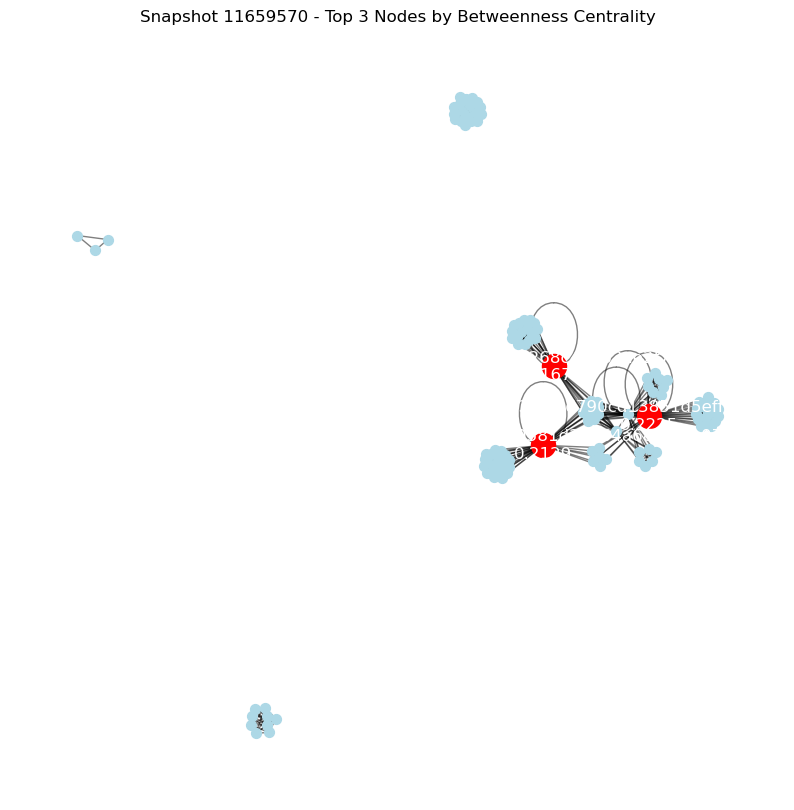

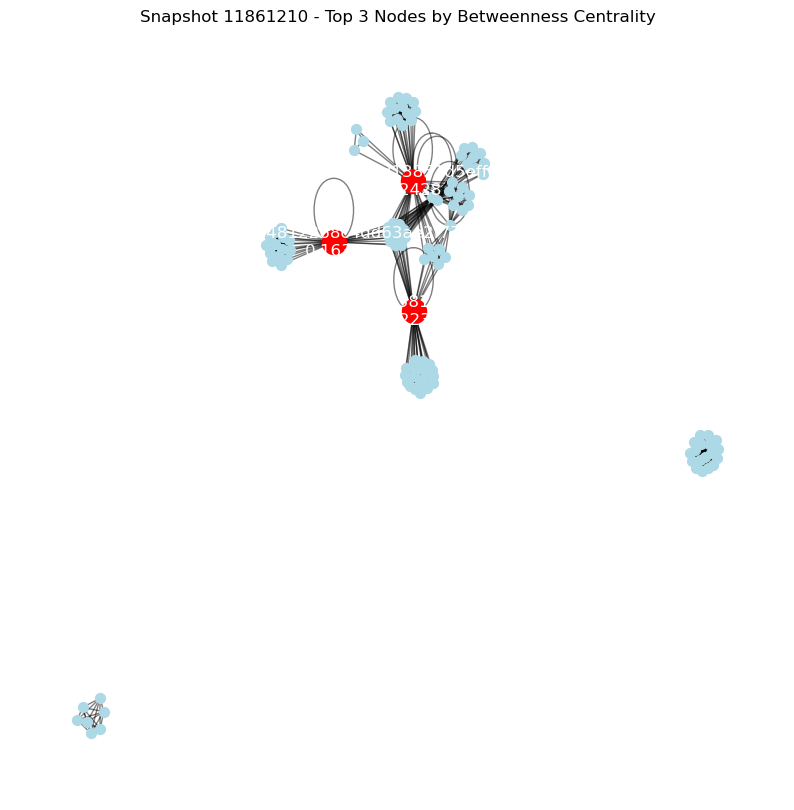

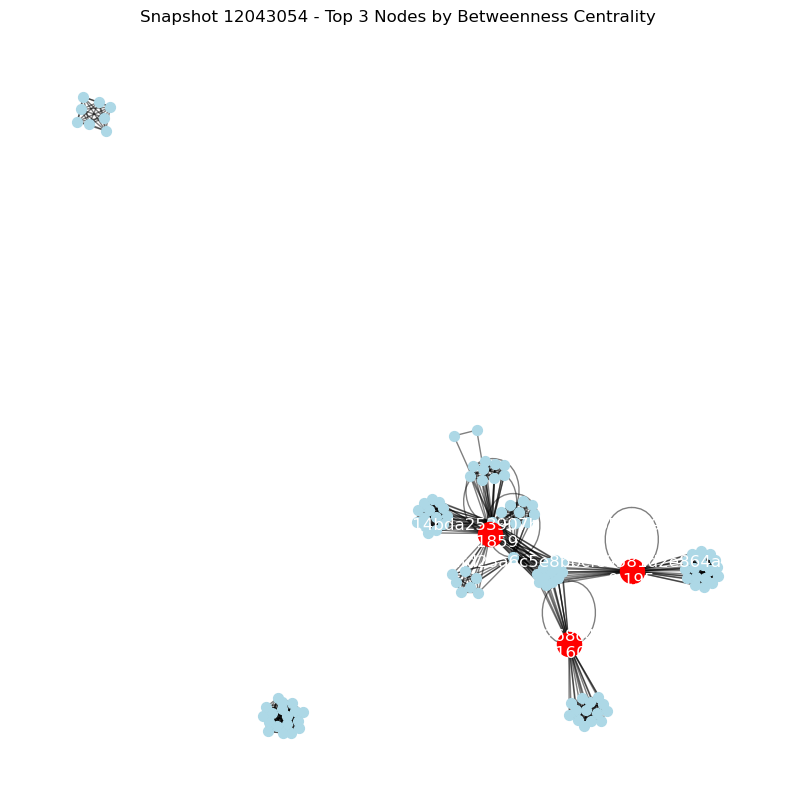

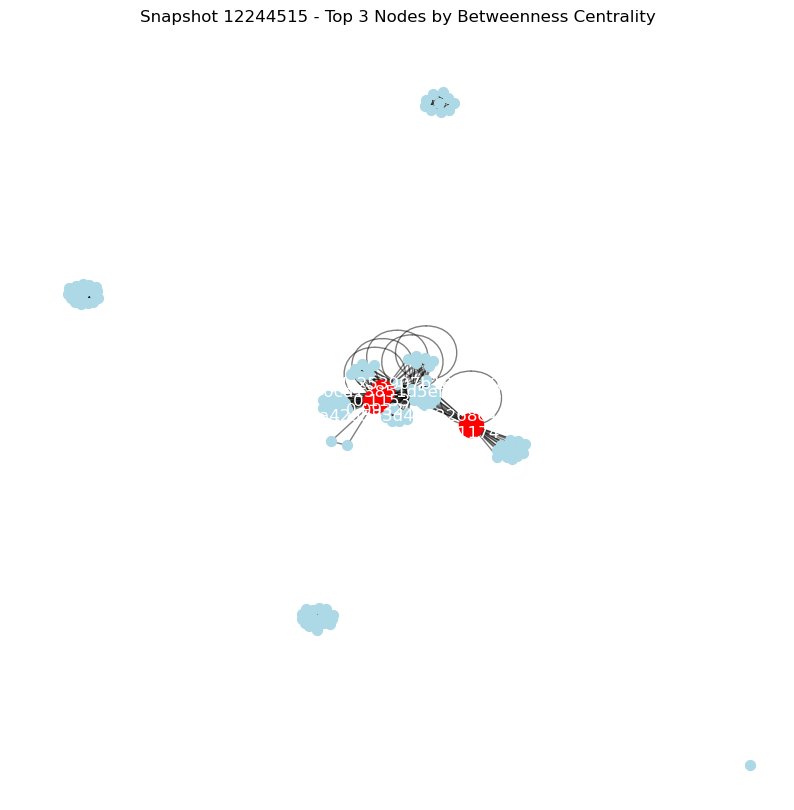

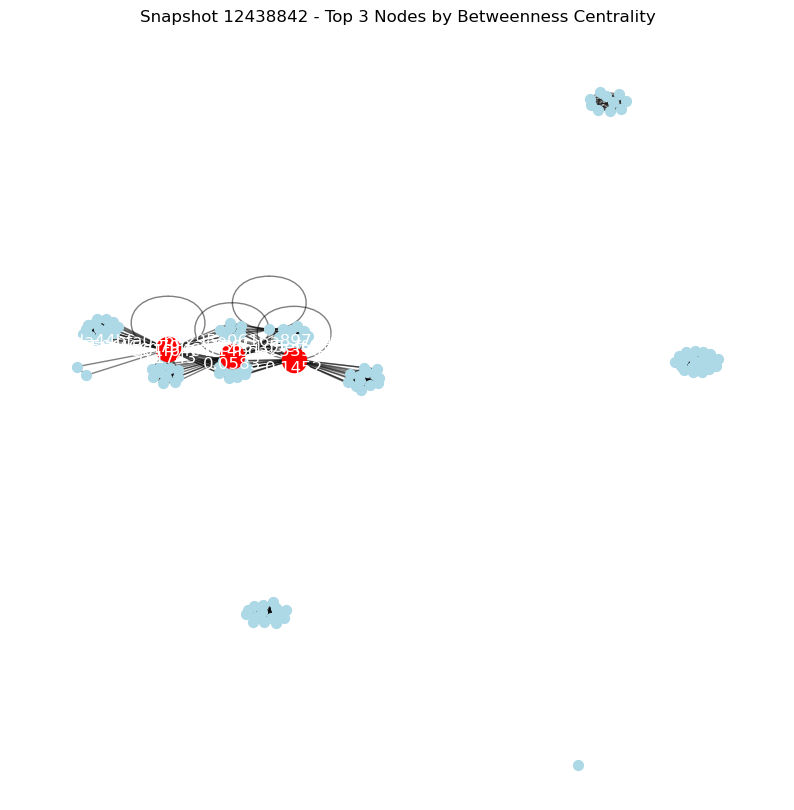

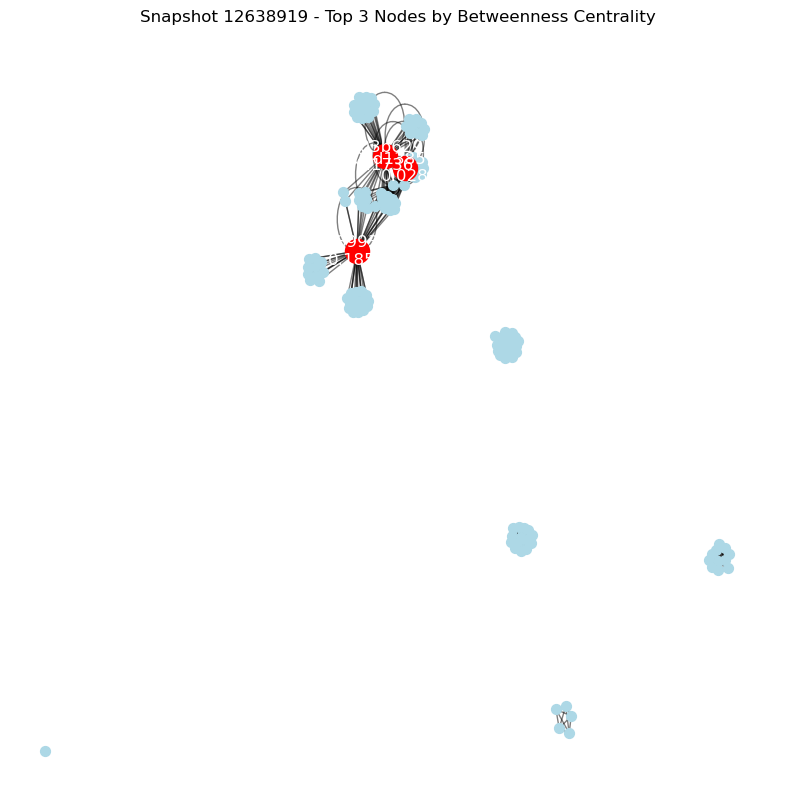

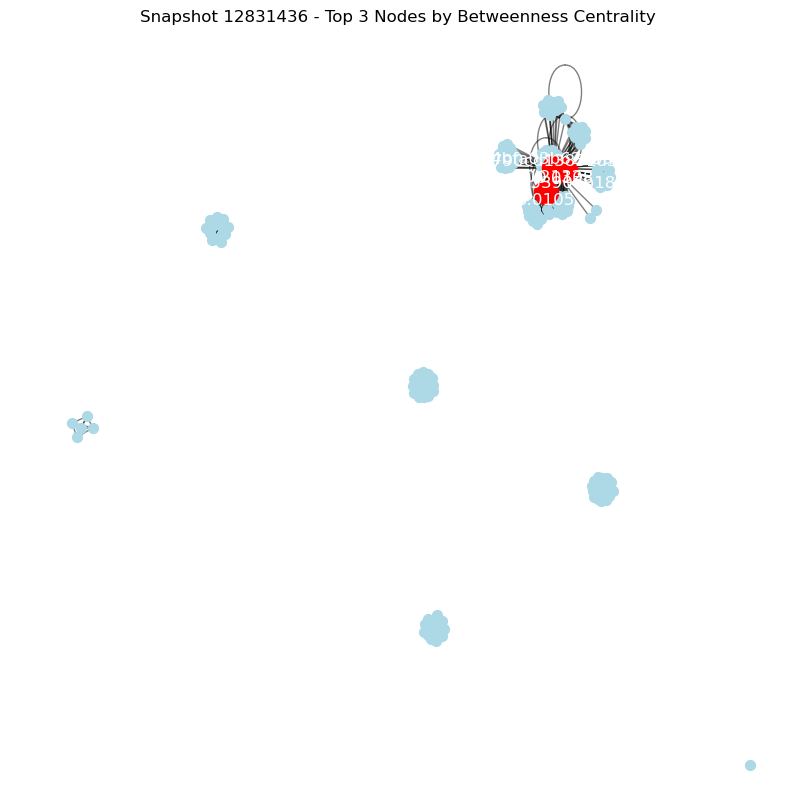

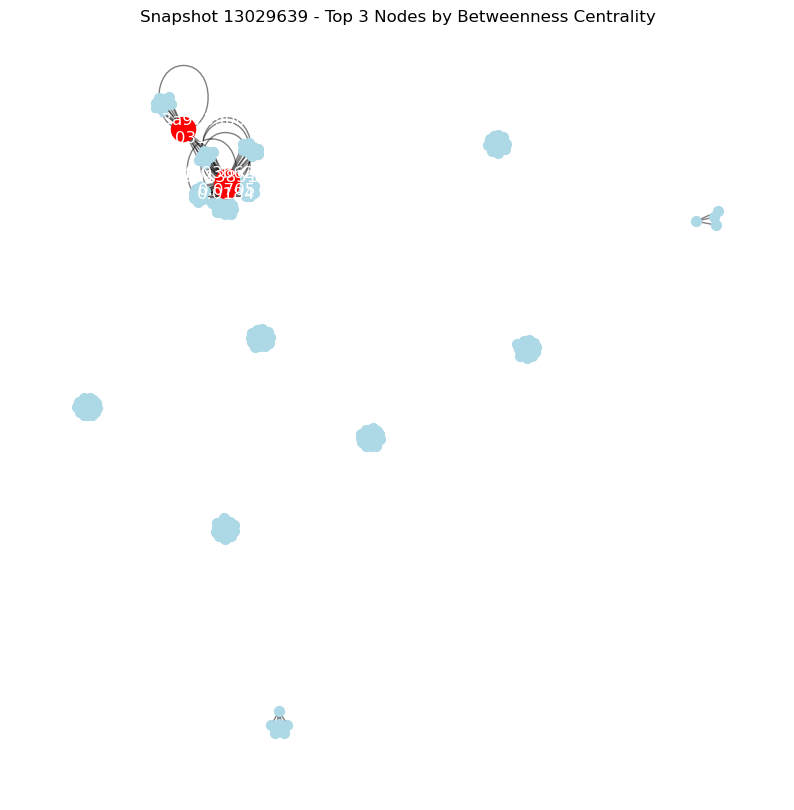

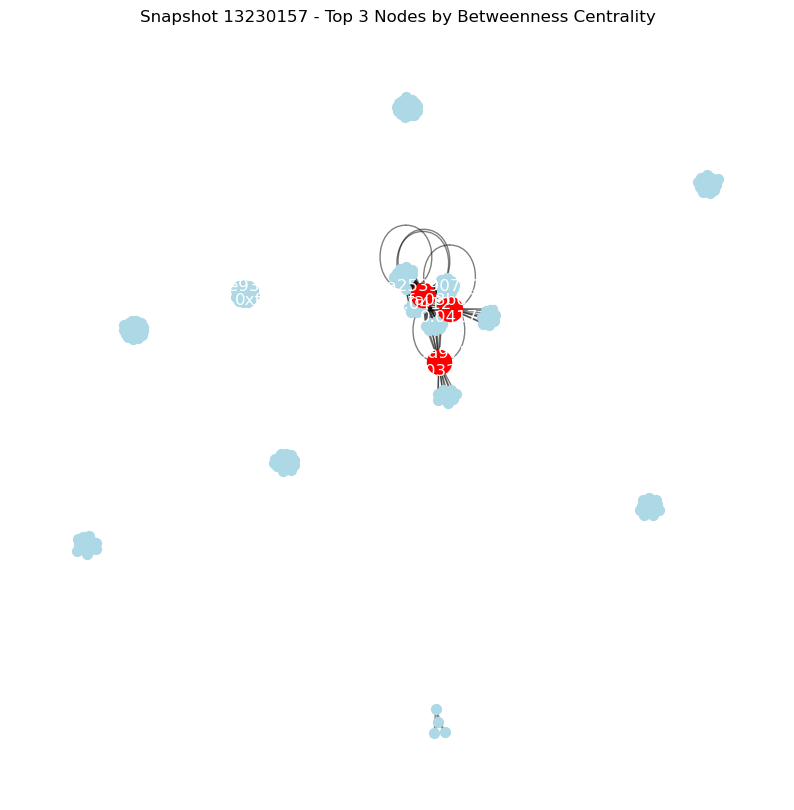

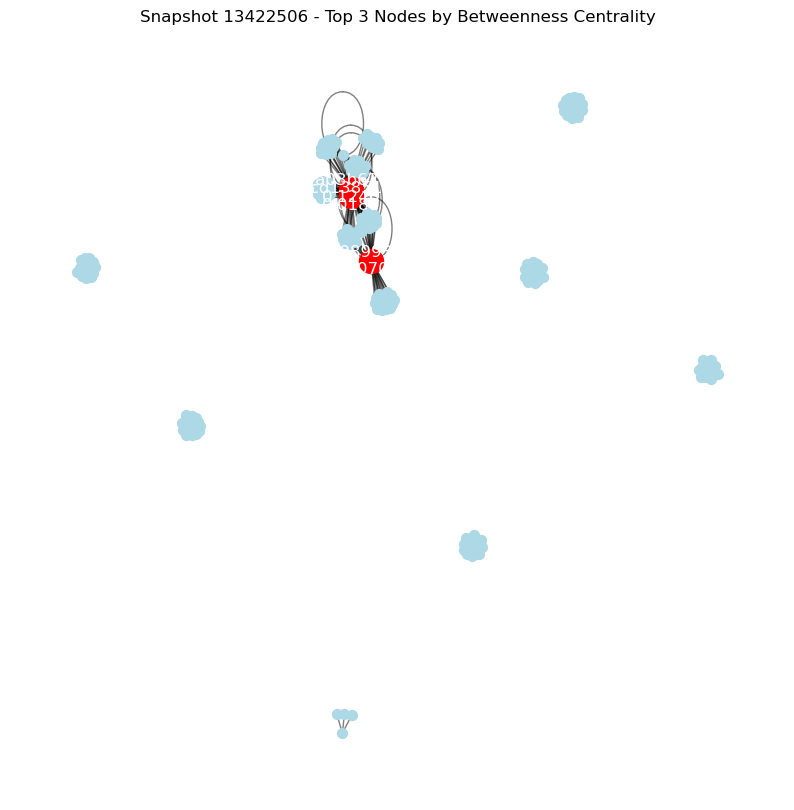

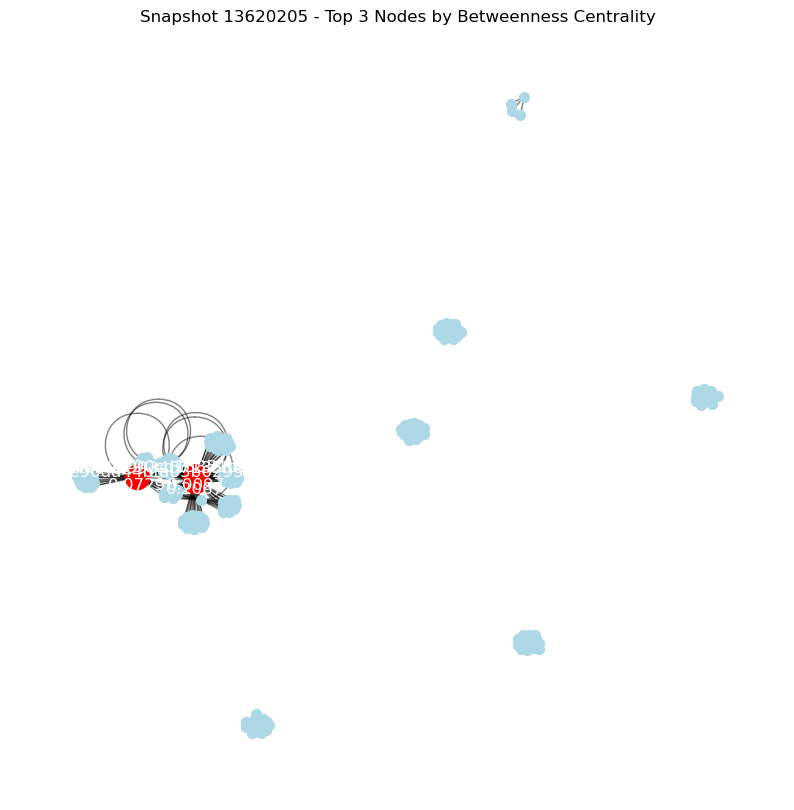

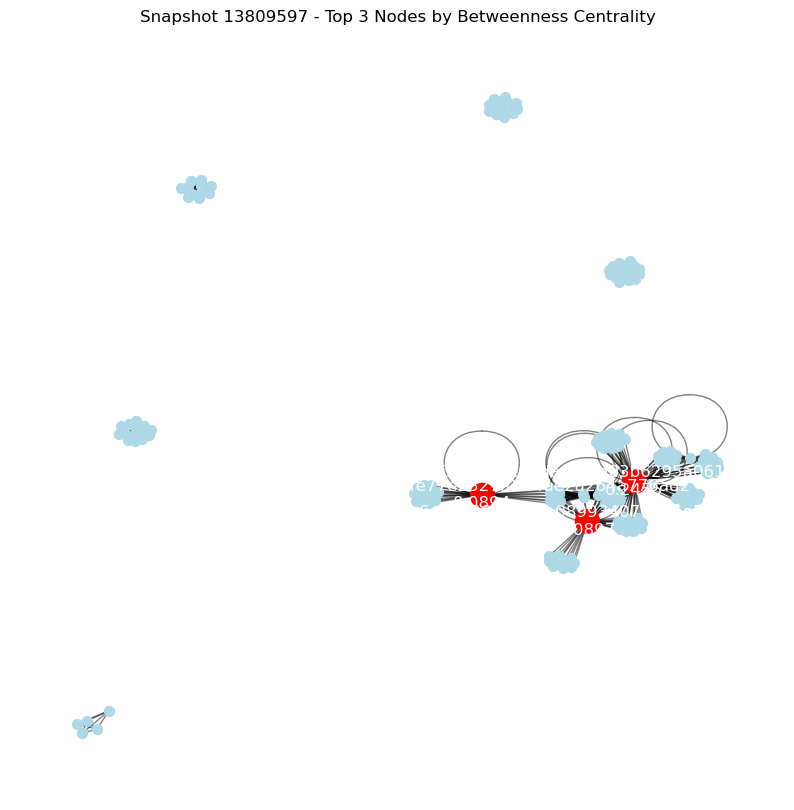

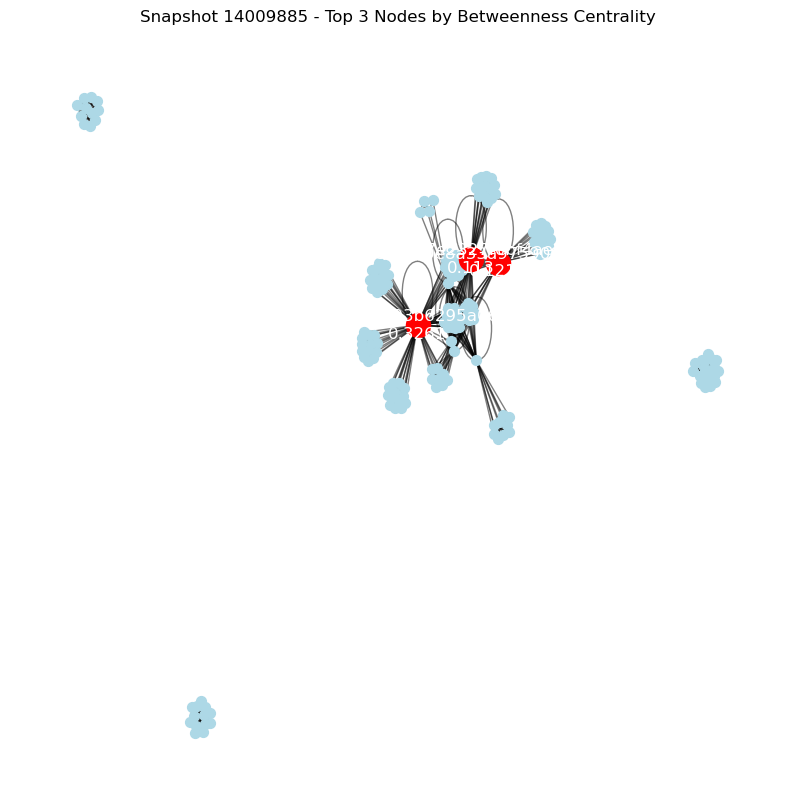

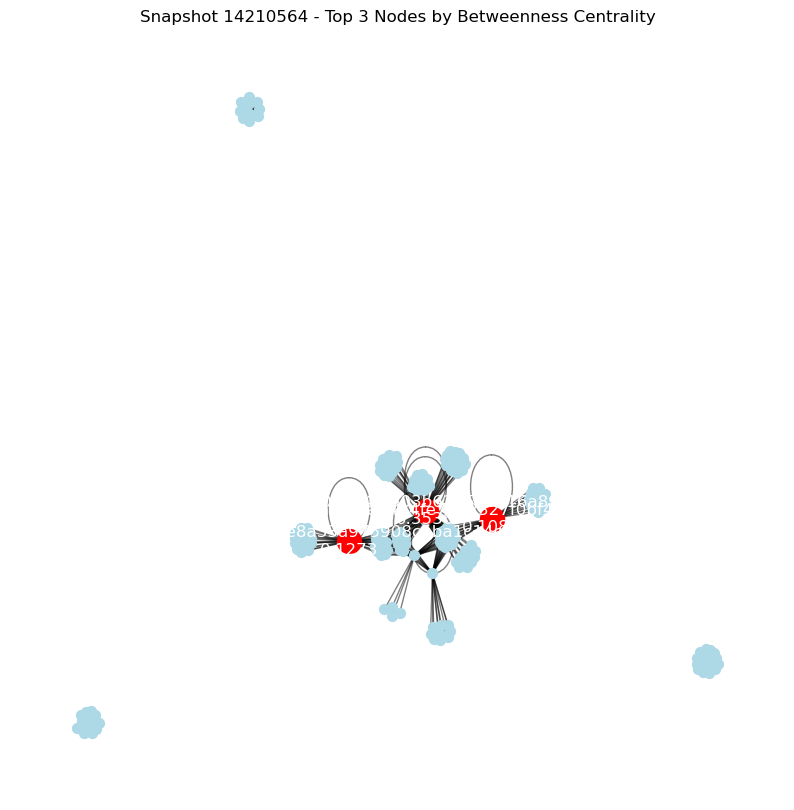

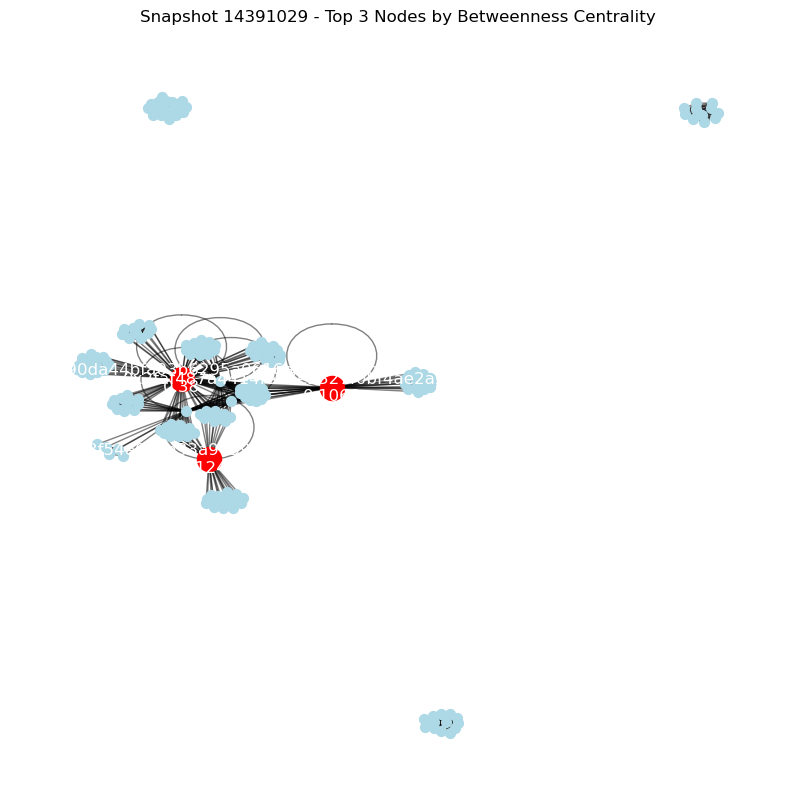

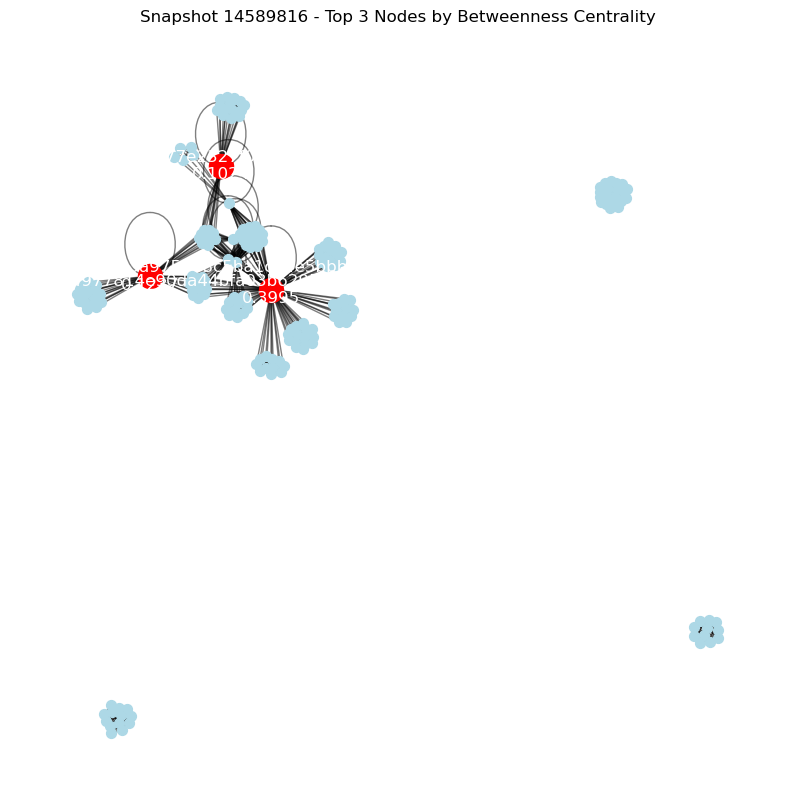

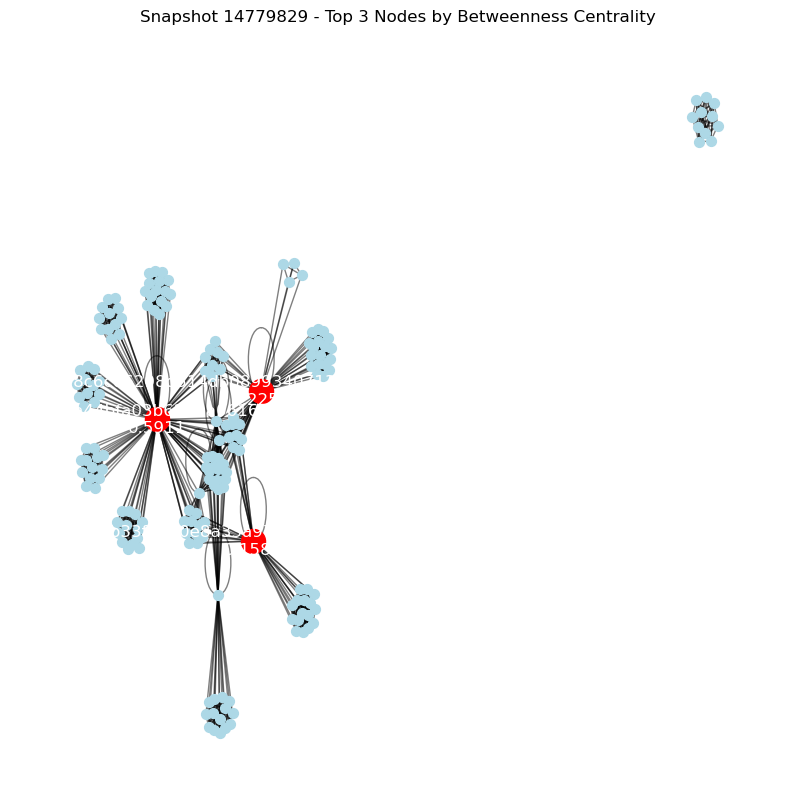

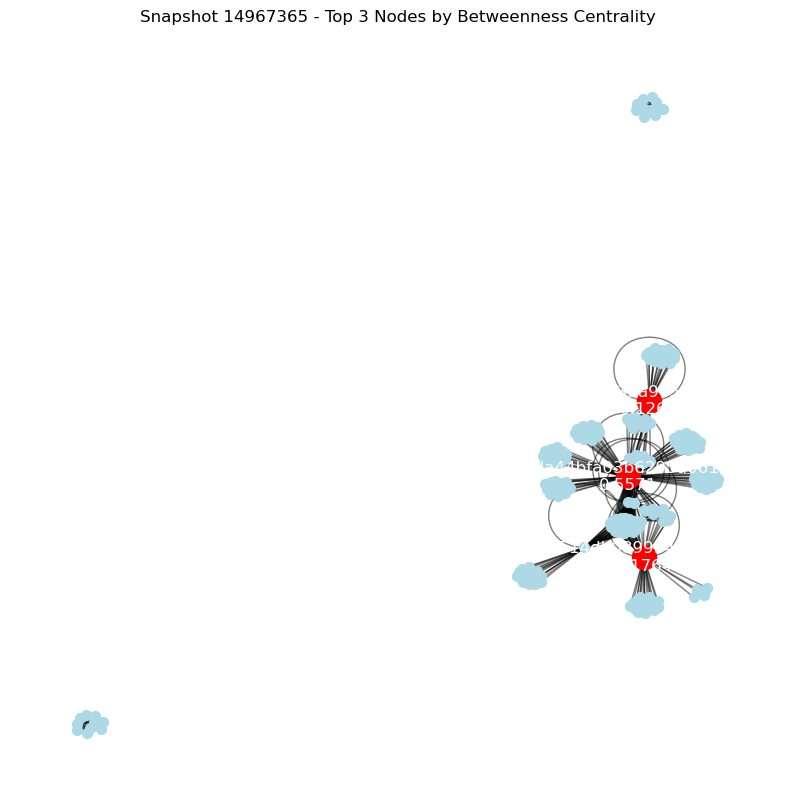

Snapshot: 11659570
  Node: 0xbe0eb53f46cd790cd13851d5eff43d12404d33e8, Betweenness Centrality: 0.2225, Token: Curve, Community: 2
  Node: 0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3, Betweenness Centrality: 0.2129, Token: Maker, Community: 0
  Node: 0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3, Betweenness Centrality: 0.1674, Token: Compound, Community: 4


Snapshot: 11861210
  Node: 0xbe0eb53f46cd790cd13851d5eff43d12404d33e8, Betweenness Centrality: 0.2428, Token: Curve, Community: 4
  Node: 0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3, Betweenness Centrality: 0.2234, Token: Maker, Community: 0
  Node: 0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3, Betweenness Centrality: 0.1637, Token: Compound, Community: 5


Snapshot: 12043054
  Node: 0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3, Betweenness Centrality: 0.1950, Token: Maker, Community: 0
  Node: 0xe93381fb4c4f14bda253907b18fad305d799241a, Betweenness Centrality: 0.1859, Token: Curve, Community: 7
  Node: 0x8328a42a583d4812268c4dd63ae2f77f37a

In [128]:
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from collections import defaultdict

def generate_top_centrality_nodes_with_info(graph_directory, token_info_path):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    top_centrality_nodes = []

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Directly use the partition without global mapping
            nx.set_node_attributes(G, partition, 'community')

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Find the top 3 nodes with the highest betweenness centrality
            top_3_nodes = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:3]

            # Store the top 3 nodes with their tokens and communities
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for node, centrality_value in top_3_nodes:
                token_address = G.nodes[node].get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')
                community = G.nodes[node]['community']
                top_centrality_nodes.append({
                    'Snapshot': snapshot_time,
                    'Node': node,
                    'Betweenness Centrality': centrality_value,
                    'Token Name': token_name,
                    'Community': community
                })

            # Update previous_communities for the next iteration
            previous_communities = partition  # Update directly with the partition

            # Visualize the graph highlighting the top 3 nodes
            visualize_graph_with_top_centrality_nodes(G, top_3_nodes, snapshot_time)

    # Convert to DataFrame for better display and analysis
    top_centrality_nodes_df = pd.DataFrame(top_centrality_nodes)
    return top_centrality_nodes_df

def visualize_graph_with_top_centrality_nodes(G, top_3_nodes, snapshot_time):
    # Draw the graph
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)
    
    # Draw all nodes
    nx.draw_networkx_nodes(G, pos, node_size=50, node_color="lightblue")
    
    # Draw all edges
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    
    # Highlight the top 3 nodes
    top_nodes = [node for node, _ in top_3_nodes]
    nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_size=300, node_color="red")
    
    # Annotate the top 3 nodes
    labels = {node: f"{node}\n{round(bc, 4)}" for node, bc in top_3_nodes}
    nx.draw_networkx_labels(G, pos, labels=labels, font_color="white")

    plt.title(f"Snapshot {snapshot_time} - Top 3 Nodes by Betweenness Centrality")
    plt.axis("off")
    plt.show()

def print_top_centrality_nodes(top_centrality_nodes_df):
    # Display the top centrality nodes in a readable format, sorted by Snapshot
    top_centrality_nodes_df.sort_values(by=['Snapshot', 'Betweenness Centrality'], ascending=[True, False], inplace=True)
    for snapshot in top_centrality_nodes_df['Snapshot'].unique():
        print(f"Snapshot: {snapshot}")
        snapshot_df = top_centrality_nodes_df[top_centrality_nodes_df['Snapshot'] == snapshot]
        for _, row in snapshot_df.iterrows():
            print(f"  Node: {row['Node']}, Betweenness Centrality: {row['Betweenness Centrality']:.4f}, Token: {row['Token Name']}, Community: {row['Community']}")
        print("\n")

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Generate the top centrality nodes with their associated information and visualize the graphs
top_centrality_nodes_df = generate_top_centrality_nodes_with_info(graph_directory, token_info_path)

# Print the top centrality nodes in a readable format, sorted by snapshot
print_top_centrality_nodes(top_centrality_nodes_df)



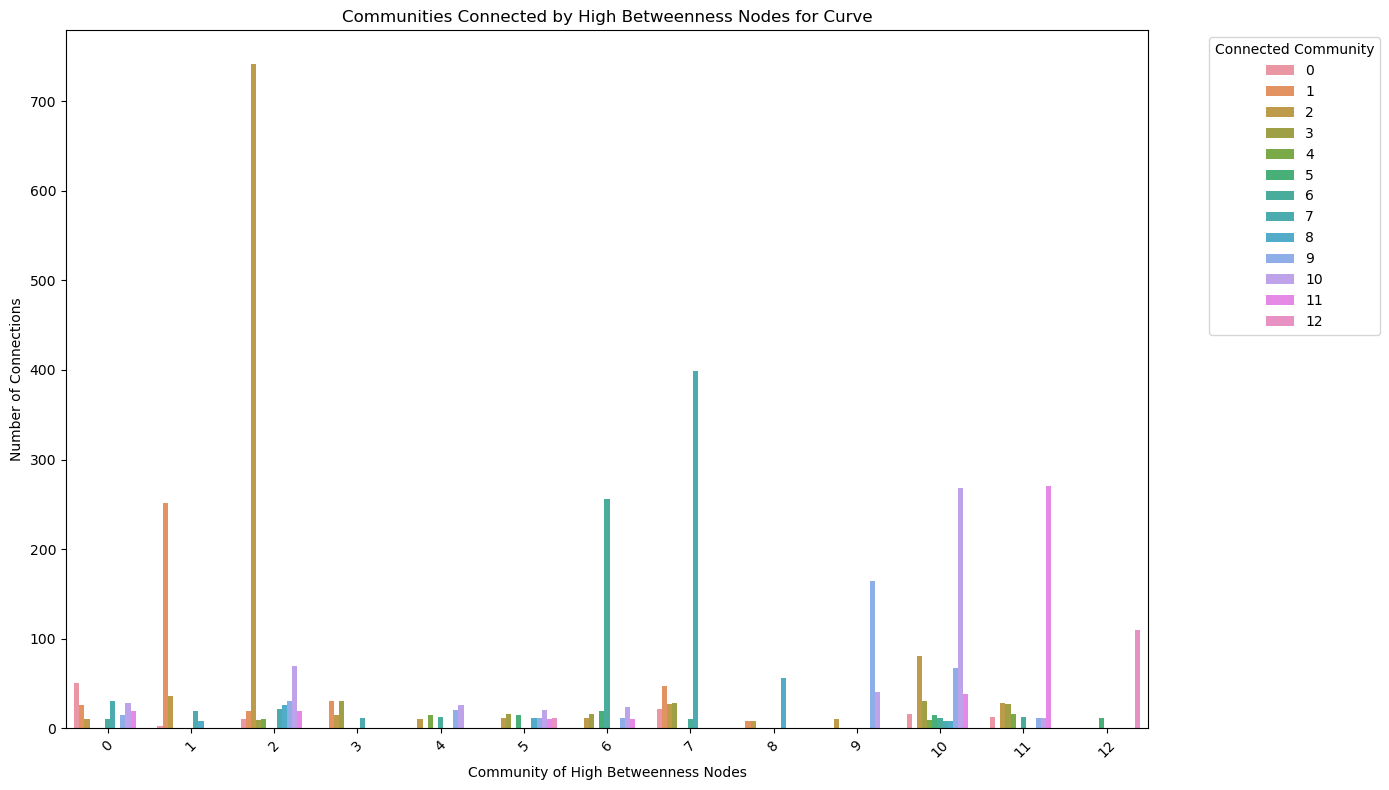

In [129]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def analyze_high_betweenness_token_connections(graph_directory, token_info_path, target_token):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    connection_data = []

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)
            nx.set_node_attributes(G, partition, 'community')

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Filter nodes associated with the target token (e.g., Curve)
            target_nodes = [node for node, data in G.nodes(data=True) 
                            if token_map.get(data.get('token_address', '').lower()) == target_token]

            # Analyze connections for the high betweenness nodes
            for node in target_nodes:
                centrality_value = betweenness[node]
                community = partition[node]
                neighbors = G.neighbors(node)

                for neighbor in neighbors:
                    neighbor_community = partition[neighbor]
                    connection_data.append({
                        'Snapshot': filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', ''),
                        'Node': node,
                        'Betweenness Centrality': centrality_value,
                        'Community': community,
                        'Connected Community': neighbor_community
                    })

    return pd.DataFrame(connection_data)

def visualize_token_connections(connection_df, target_token):
    # Create a plot to visualize the communities connected by high-betweenness nodes
    plt.figure(figsize=(14, 8))
    sns.countplot(data=connection_df, x='Community', hue='Connected Community')
    plt.title(f'Communities Connected by High Betweenness Nodes for {target_token}')
    plt.xlabel('Community of High Betweenness Nodes')
    plt.ylabel('Number of Connections')
    plt.legend(title='Connected Community', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Analyze the connections of high betweenness nodes associated with a specific token (e.g., Curve)
connection_df = analyze_high_betweenness_token_connections(graph_directory, token_info_path, target_token='Curve')

# Visualize the connections between communities
visualize_token_connections(connection_df, target_token='Curve')


# Checking for prominent wallets that have high betweeness centrality

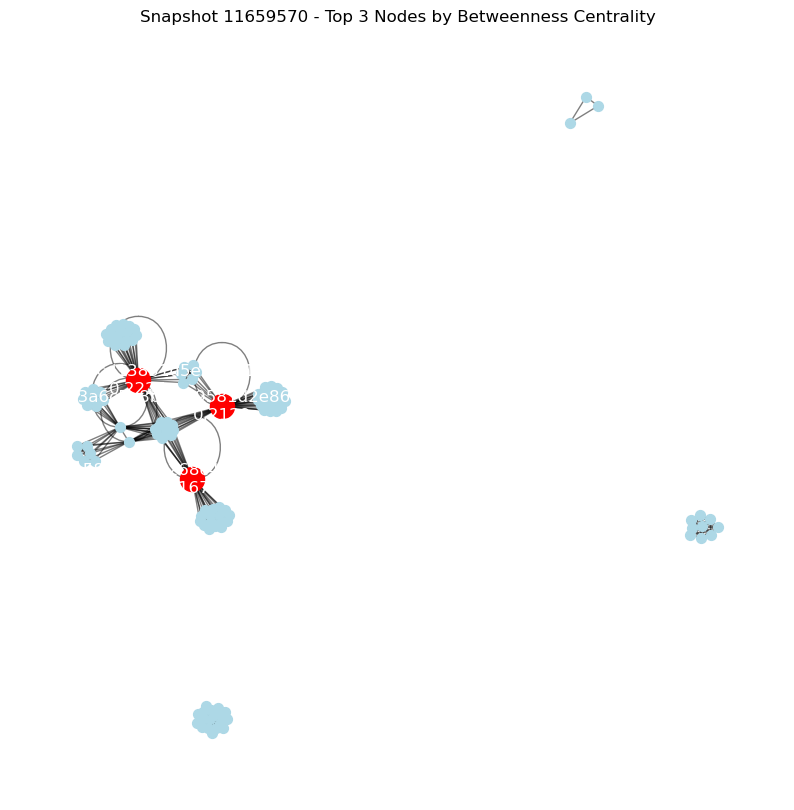

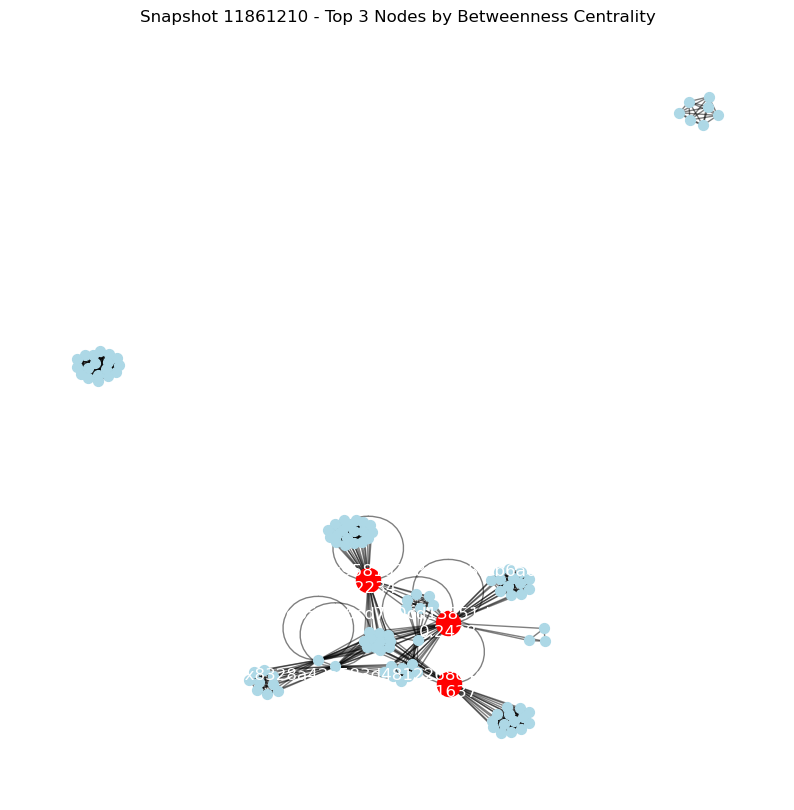

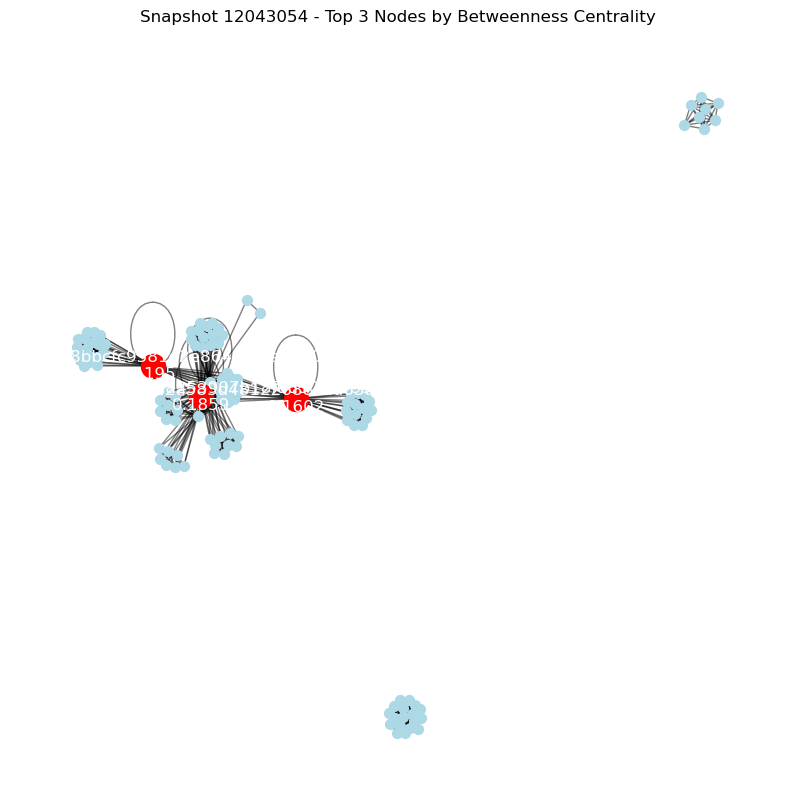

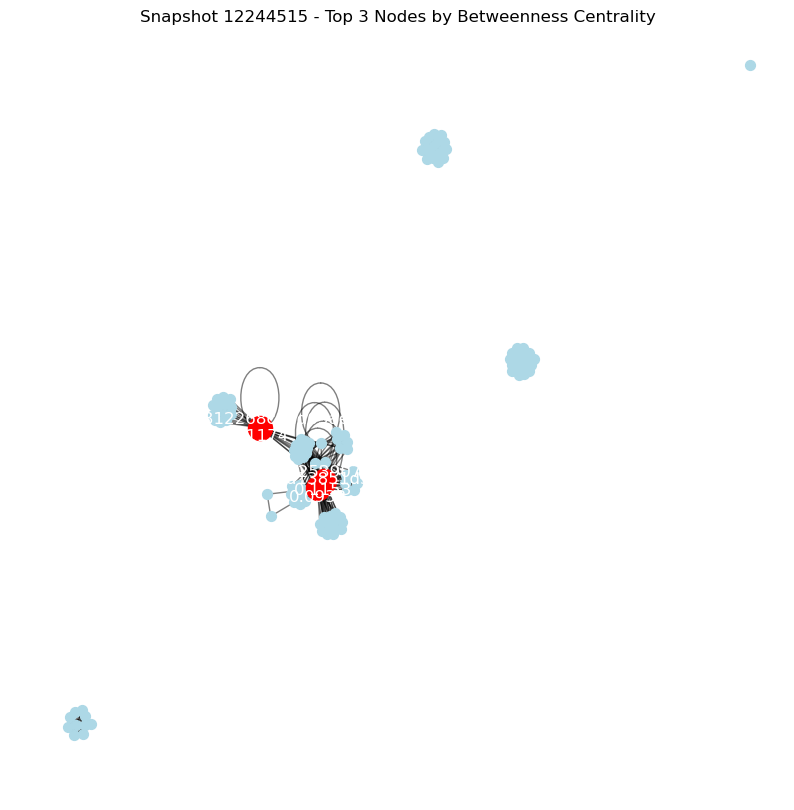

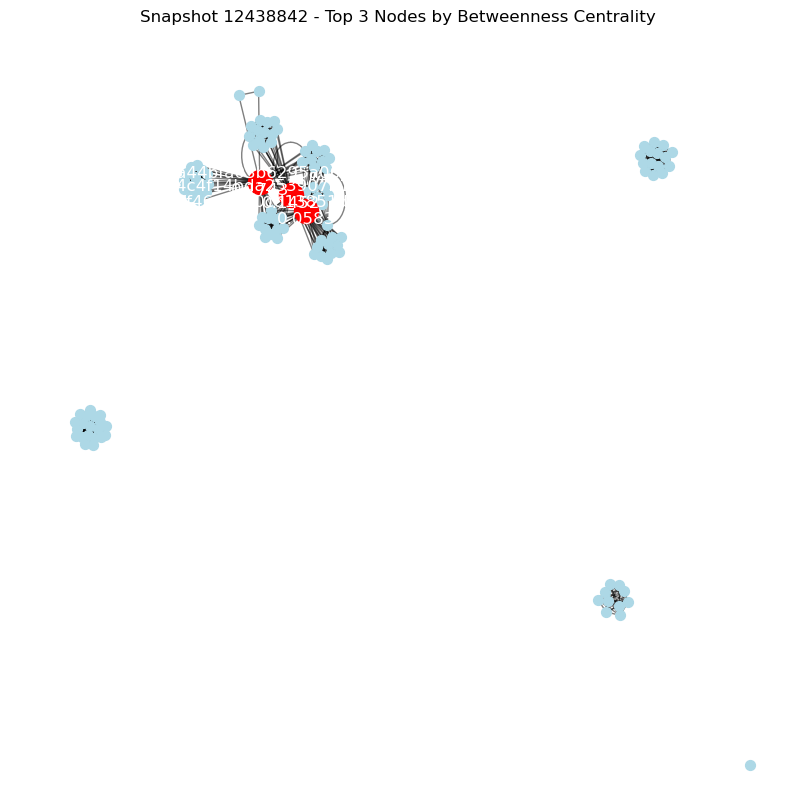

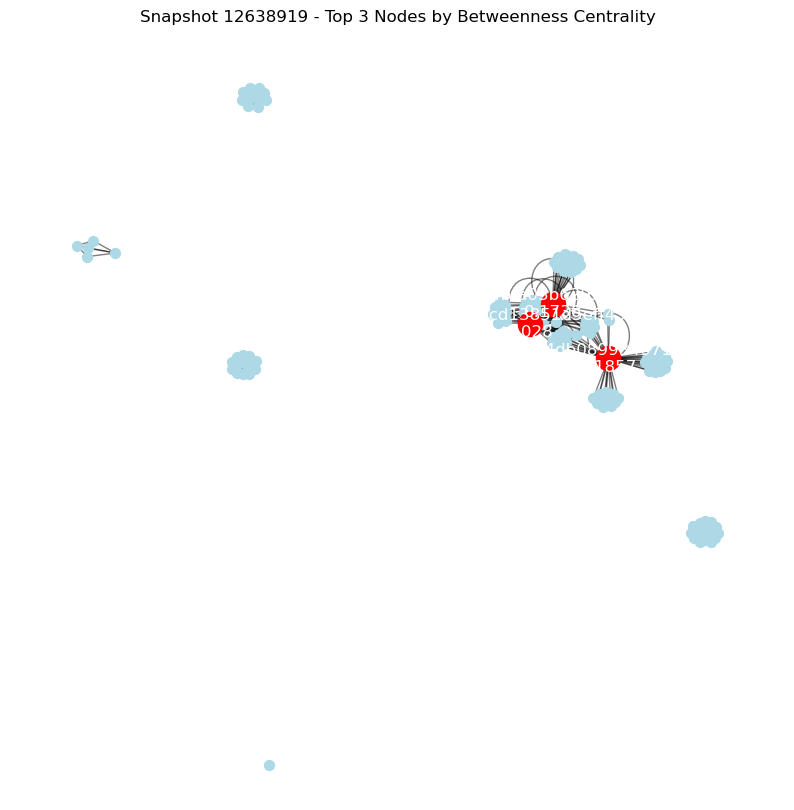

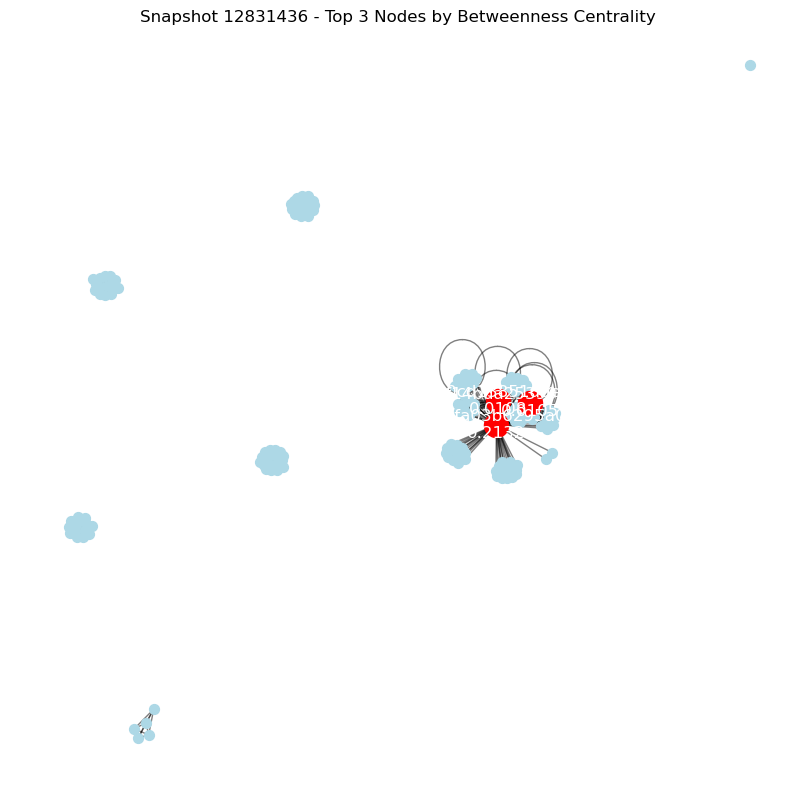

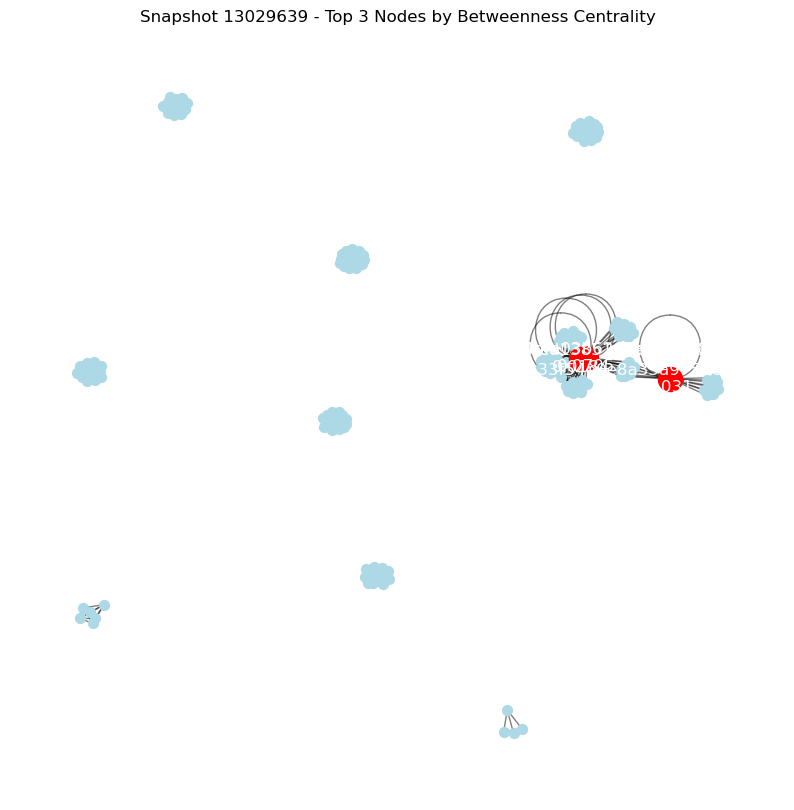

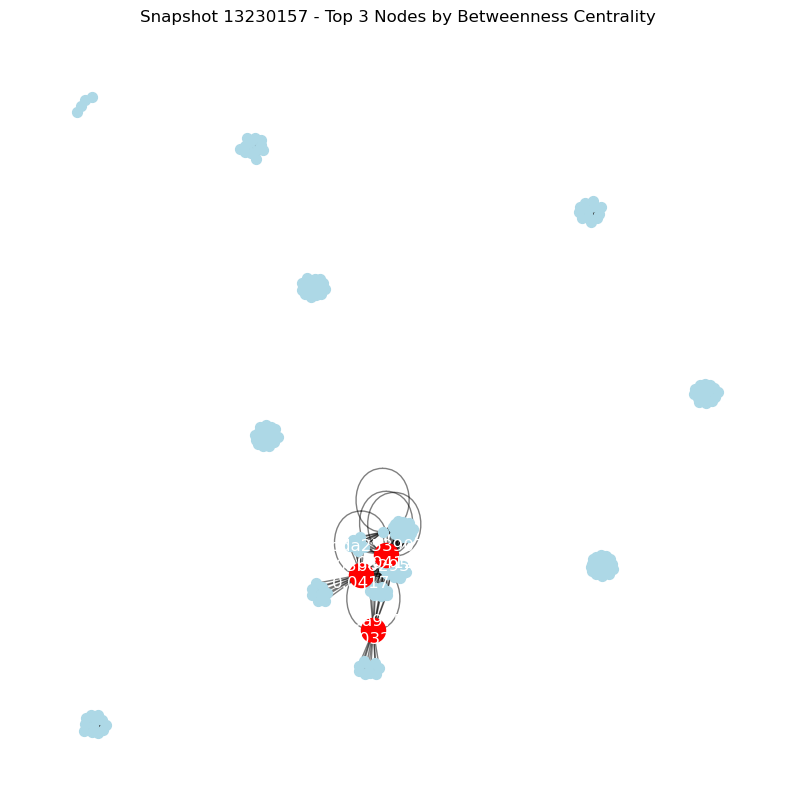

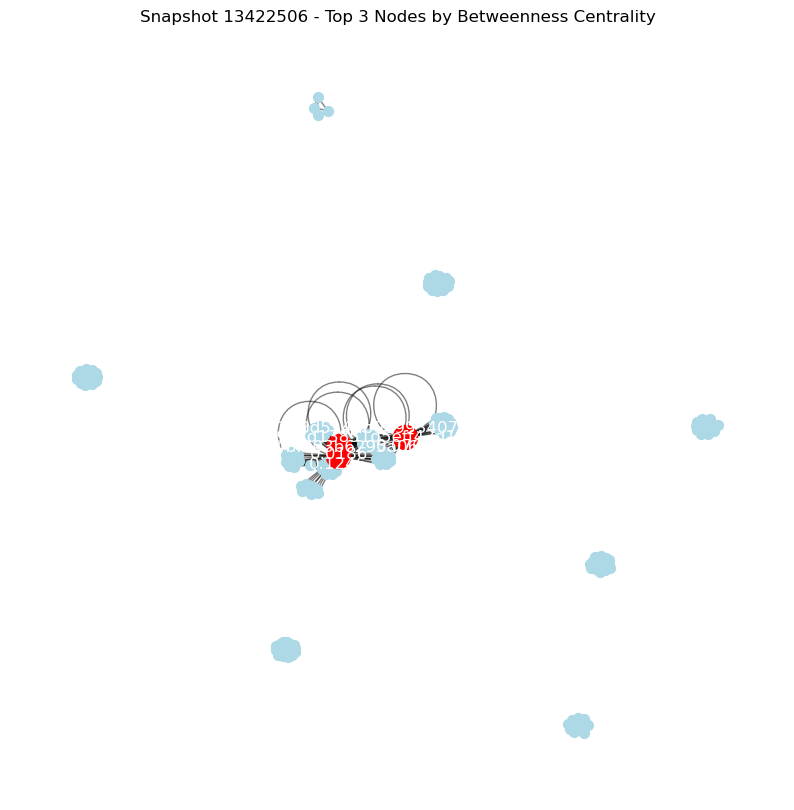

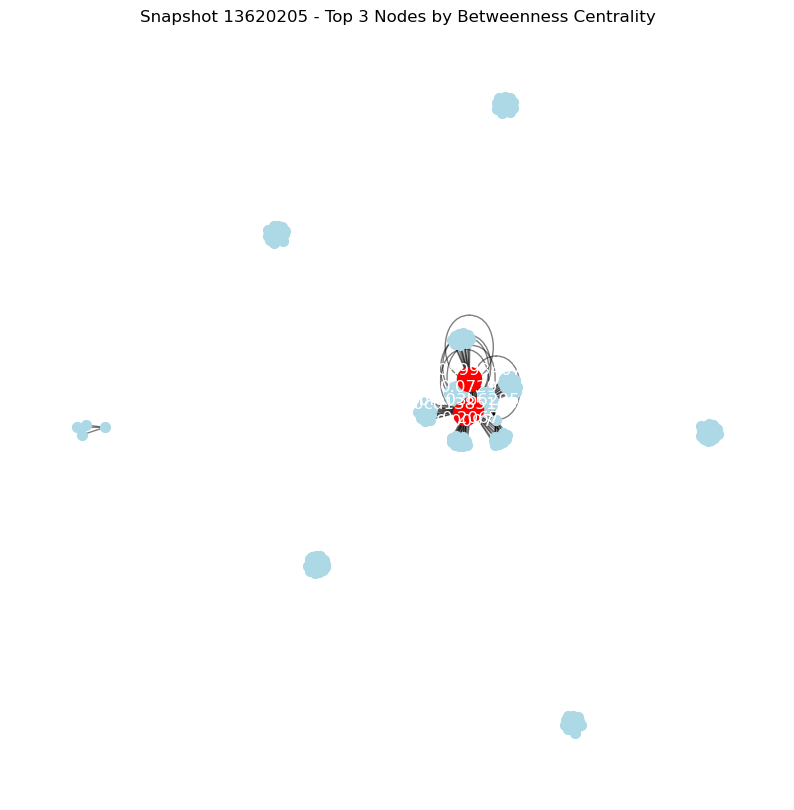

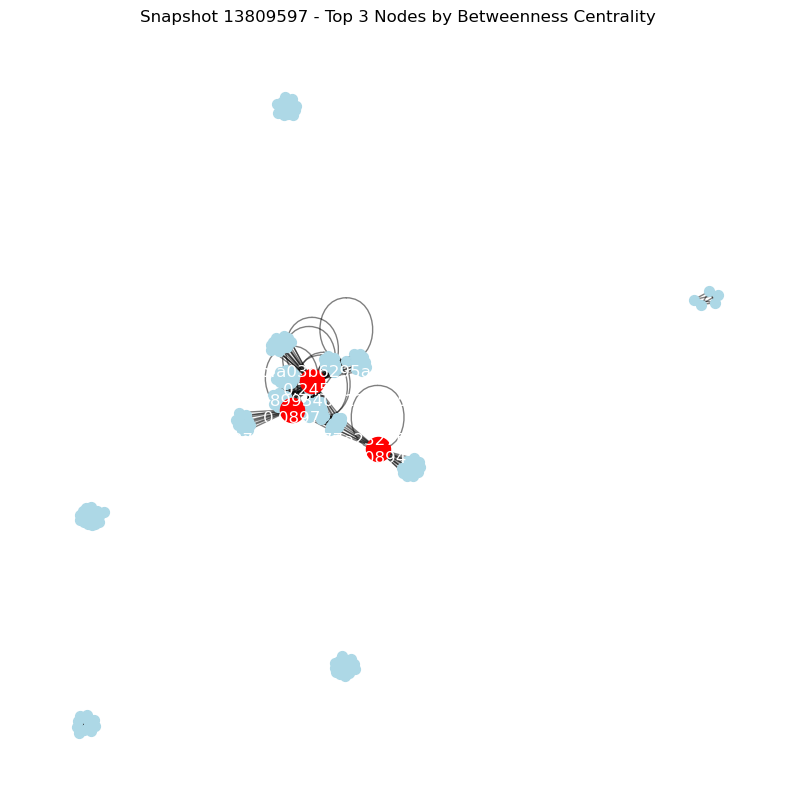

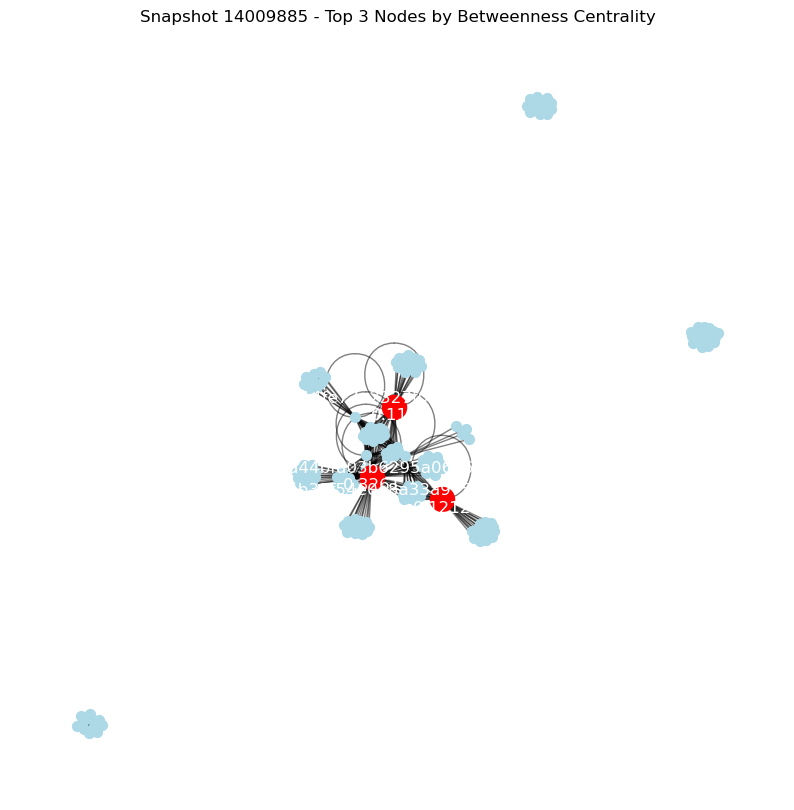

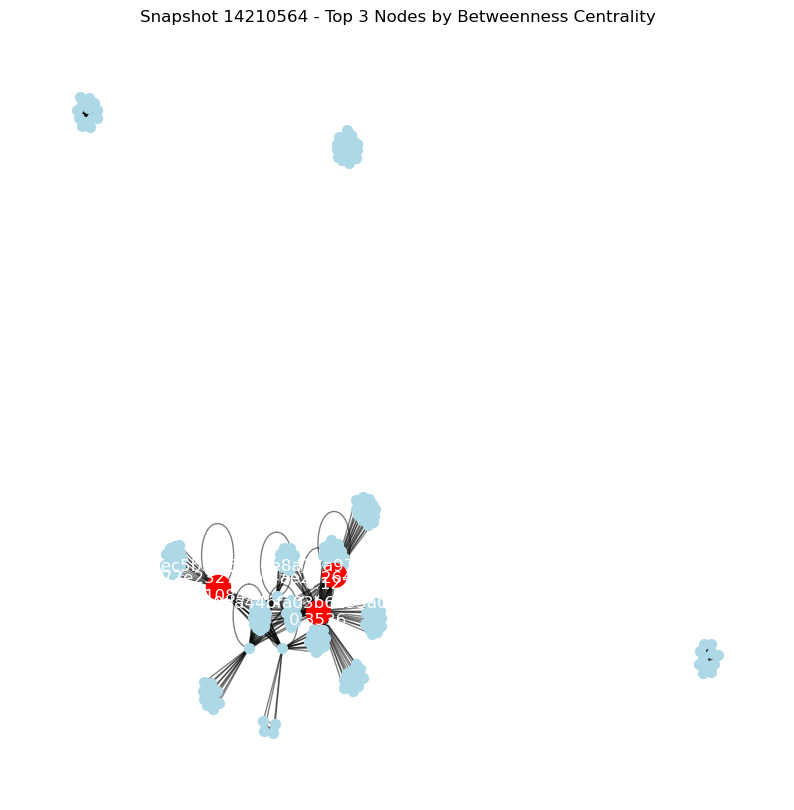

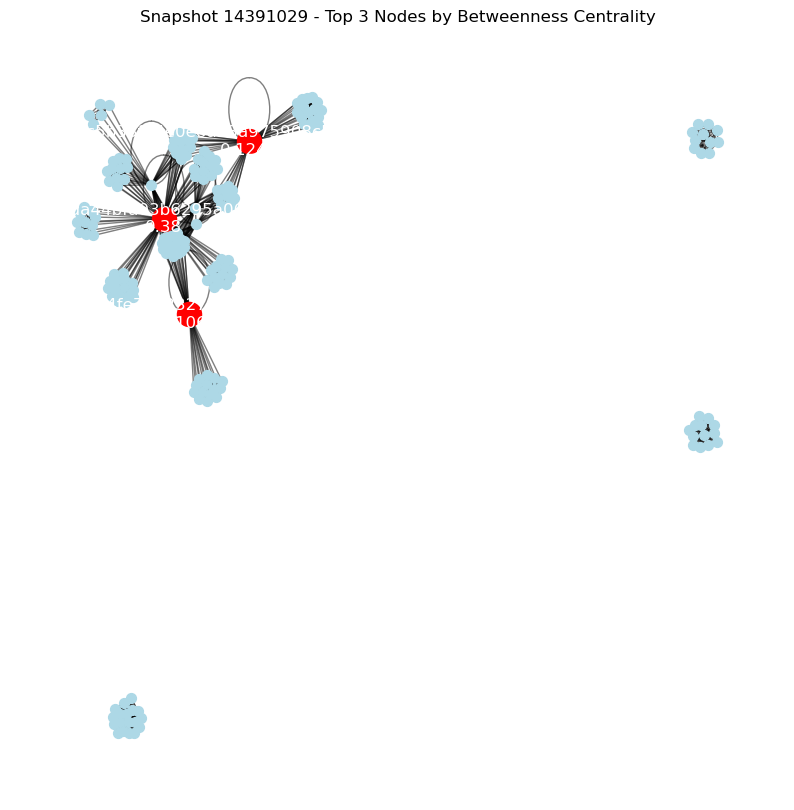

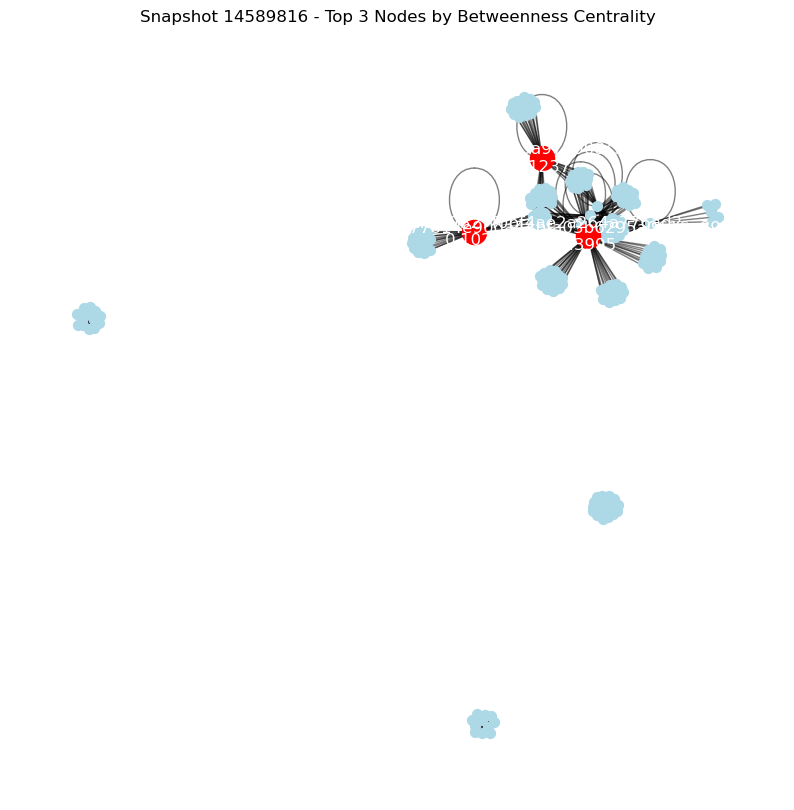

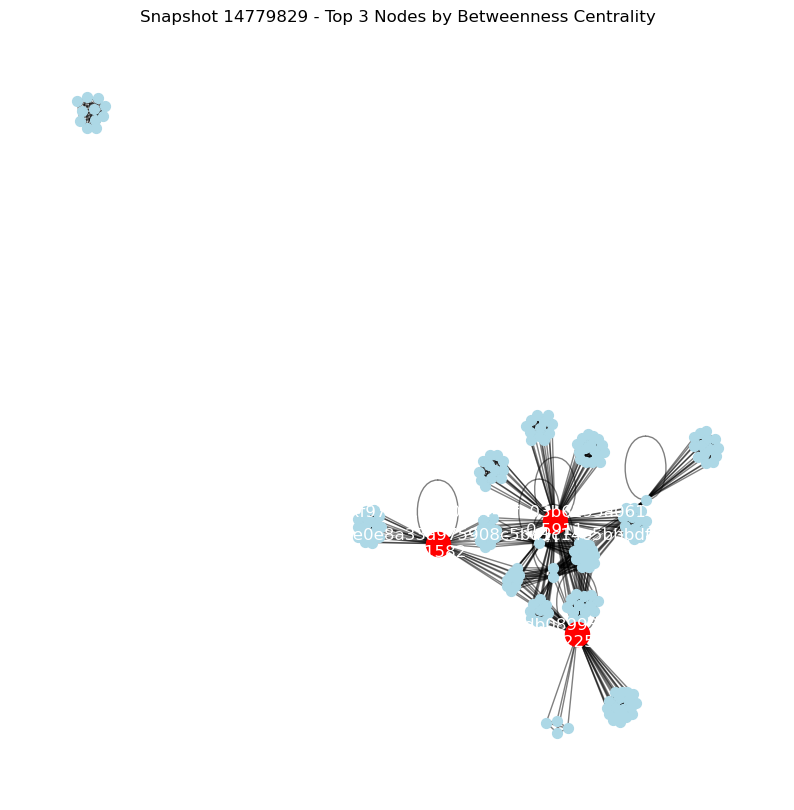

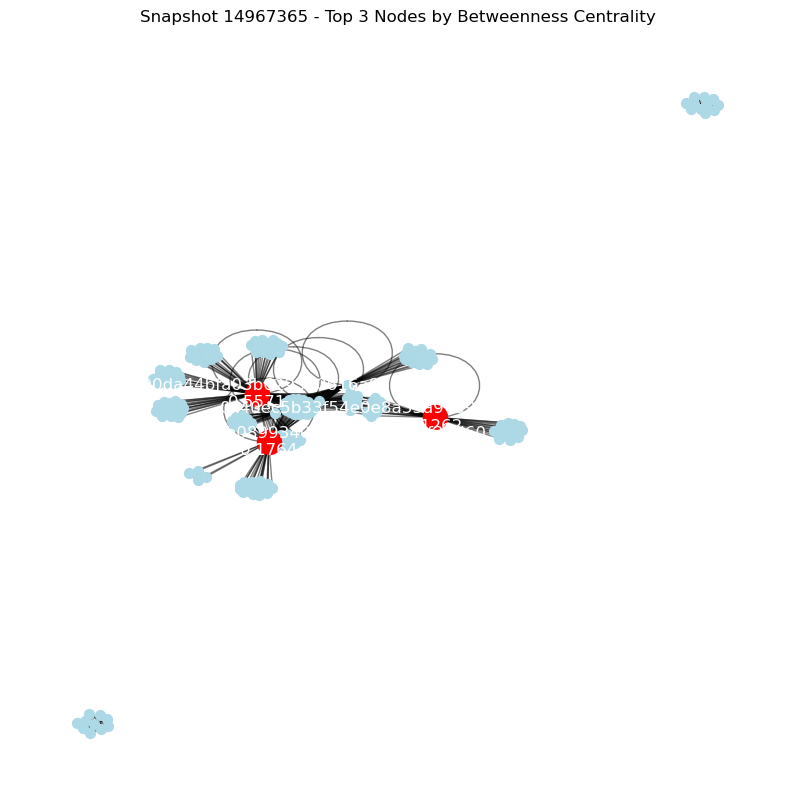

Snapshot: 11659570
  Node: 0xbe0eb53f46cd790cd13851d5eff43d12404d33e8, Betweenness Centrality: 0.2225, Token: Curve, Community: 2
  Node: 0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3, Betweenness Centrality: 0.2129, Token: Maker, Community: 0
  Node: 0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3, Betweenness Centrality: 0.1674, Token: Compound, Community: 4


Snapshot: 11861210
  Node: 0xbe0eb53f46cd790cd13851d5eff43d12404d33e8, Betweenness Centrality: 0.2428, Token: Curve, Community: 3
  Node: 0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3, Betweenness Centrality: 0.2234, Token: Maker, Community: 0
  Node: 0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3, Betweenness Centrality: 0.1637, Token: Compound, Community: 5


Snapshot: 12043054
  Node: 0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3, Betweenness Centrality: 0.1950, Token: Maker, Community: 0
  Node: 0xe93381fb4c4f14bda253907b18fad305d799241a, Betweenness Centrality: 0.1859, Token: Curve, Community: 3
  Node: 0x8328a42a583d4812268c4dd63ae2f77f37a

In [130]:
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from collections import defaultdict

def generate_top_centrality_nodes_with_info(graph_directory, token_info_path):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    top_centrality_nodes = []
    wallet_centrality = defaultdict(list)

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Directly use the partition without global mapping
            nx.set_node_attributes(G, partition, 'community')

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Find the top 3 nodes with the highest betweenness centrality
            top_3_nodes = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:3]

            # Store the top 3 nodes with their tokens and communities
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for node, centrality_value in top_3_nodes:
                token_address = G.nodes[node].get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')
                community = G.nodes[node]['community']
                top_centrality_nodes.append({
                    'Snapshot': snapshot_time,
                    'Node': node,
                    'Betweenness Centrality': centrality_value,
                    'Token Name': token_name,
                    'Community': community
                })
                # Track the wallet address and its betweenness centrality across snapshots
                wallet_centrality[node].append(centrality_value)

            # Visualize the graph highlighting the top 3 nodes
            visualize_graph_with_top_centrality_nodes(G, top_3_nodes, snapshot_time)

    # Convert to DataFrame for better display and analysis
    top_centrality_nodes_df = pd.DataFrame(top_centrality_nodes)
    return top_centrality_nodes_df, wallet_centrality

def visualize_graph_with_top_centrality_nodes(G, top_3_nodes, snapshot_time):
    # Draw the graph
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)
    
    # Draw all nodes
    nx.draw_networkx_nodes(G, pos, node_size=50, node_color="lightblue")
    
    # Draw all edges
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    
    # Highlight the top 3 nodes
    top_nodes = [node for node, _ in top_3_nodes]
    nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_size=300, node_color="red")
    
    # Annotate the top 3 nodes
    labels = {node: f"{node}\n{round(bc, 4)}" for node, bc in top_3_nodes}
    nx.draw_networkx_labels(G, pos, labels=labels, font_color="white")

    plt.title(f"Snapshot {snapshot_time} - Top 3 Nodes by Betweenness Centrality")
    plt.axis("off")
    plt.show()

def print_top_centrality_nodes(top_centrality_nodes_df):
    # Display the top centrality nodes in a readable format, sorted by Snapshot
    top_centrality_nodes_df.sort_values(by=['Snapshot', 'Betweenness Centrality'], ascending=[True, False], inplace=True)
    for snapshot in top_centrality_nodes_df['Snapshot'].unique():
        print(f"Snapshot: {snapshot}")
        snapshot_df = top_centrality_nodes_df[top_centrality_nodes_df['Snapshot'] == snapshot]
        for _, row in snapshot_df.iterrows():
            print(f"  Node: {row['Node']}, Betweenness Centrality: {row['Betweenness Centrality']:.4f}, Token: {row['Token Name']}, Community: {row['Community']}")
        print("\n")

def analyze_recurring_wallets(wallet_centrality):
    # Analyze and print recurring wallets with high betweenness centrality
    print("Recurring Wallet Addresses with High Betweenness Centrality:")
    for wallet, centralities in wallet_centrality.items():
        if len(centralities) > 1:
            print(f"  Wallet: {wallet}, Centralities: {centralities}, Occurrences: {len(centralities)}")
    print("\n")

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Generate the top centrality nodes with their associated information and visualize the graphs
top_centrality_nodes_df, wallet_centrality = generate_top_centrality_nodes_with_info(graph_directory, token_info_path)

# Print the top centrality nodes in a readable format, sorted by snapshot
print_top_centrality_nodes(top_centrality_nodes_df)

# Analyze and print recurring wallets with high betweenness centrality
analyze_recurring_wallets(wallet_centrality)


## There indeed seems to be 8 wallets that are consistently in the top 3 highest betweeness categories

In [131]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def calculate_betweenness_centrality_per_token(graph_directory, token_info_path):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    token_betweenness_centrality = defaultdict(float)

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Calculate betweenness centrality for each node
            betweenness_centrality = nx.betweenness_centrality(G)

            # Aggregate betweenness centrality per token
            for node, centrality_value in betweenness_centrality.items():
                token_address = G.nodes[node].get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')
                token_betweenness_centrality[token_name] += centrality_value

    # Convert to DataFrame for easier analysis
    token_betweenness_df = pd.DataFrame(list(token_betweenness_centrality.items()), columns=['Token Name', 'Betweenness Centrality'])
    
    return token_betweenness_df

def print_top_tokens_by_betweenness_centrality(token_betweenness_df, top_n=10):
    # Sort by betweenness centrality and print the top tokens
    top_tokens = token_betweenness_df.sort_values(by='Betweenness Centrality', ascending=False).head(top_n)
    print("Top Tokens by Betweenness Centrality:")
    print(top_tokens)

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Calculate betweenness centrality per token
token_betweenness_df = calculate_betweenness_centrality_per_token(graph_directory, token_info_path)

# Print the top tokens by betweenness centrality
print_top_tokens_by_betweenness_centrality(token_betweenness_df)


Top Tokens by Betweenness Centrality:
       Token Name  Betweenness Centrality
8           Curve                5.033475
1   Yearn Finance                1.747714
4        Compound                1.657179
7            Aave                1.432511
6        Balancer                1.300346
0           Maker                0.631198
9           Sushi                0.625190
12         Bitdao                0.467533
13           Dydx                0.143256
11         Convex                0.039120


# Analyse community roles

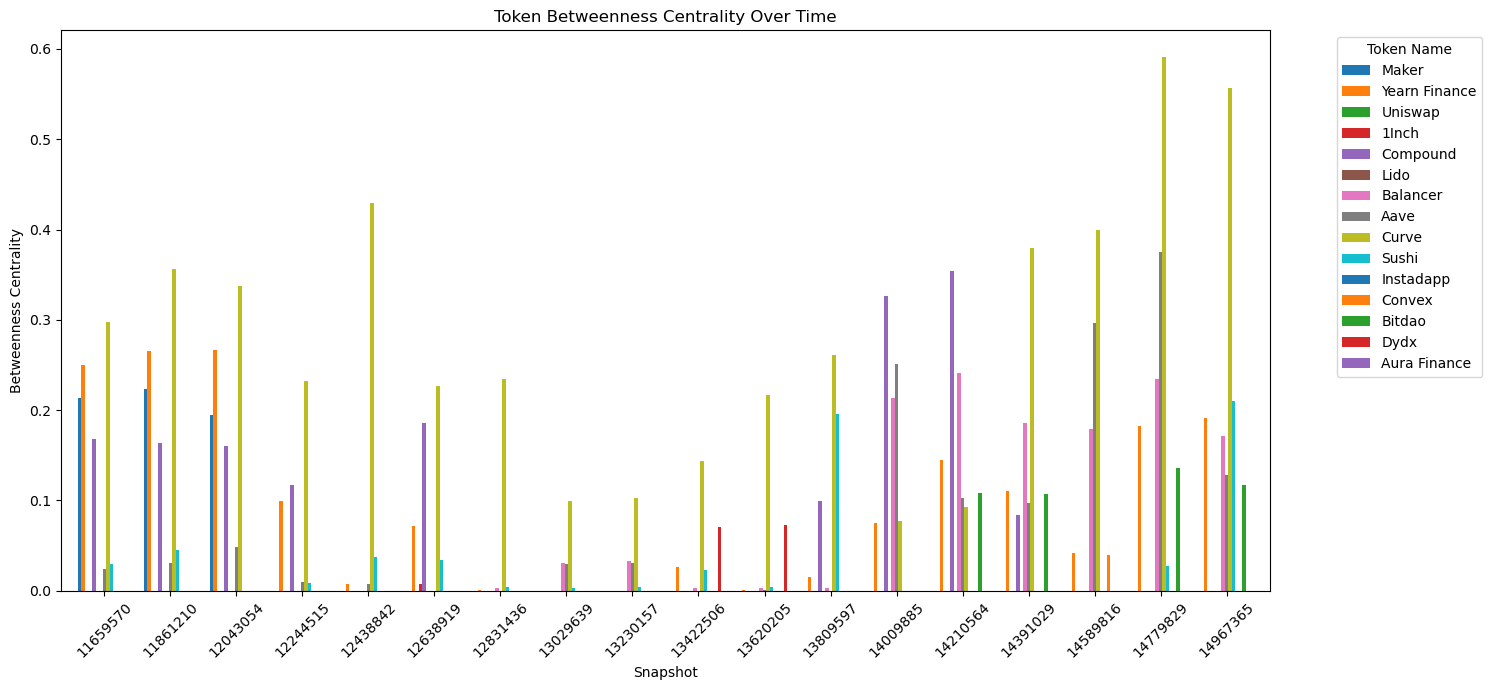

Top Tokens by Betweenness Centrality:
       Token Name  Betweenness Centrality
8           Curve                5.033475
1   Yearn Finance                1.747714
4        Compound                1.657179
7            Aave                1.432511
6        Balancer                1.300346
0           Maker                0.631198
9           Sushi                0.625190
12         Bitdao                0.467533
13           Dydx                0.143256
11         Convex                0.039120


In [132]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def calculate_betweenness_centrality_per_token(graph_directory, token_info_path):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    token_betweenness_centrality = defaultdict(float)
    snapshot_centrality = defaultdict(lambda: defaultdict(float))

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Calculate betweenness centrality for each node
            betweenness_centrality = nx.betweenness_centrality(G)

            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')

            # Aggregate betweenness centrality per token
            for node, centrality_value in betweenness_centrality.items():
                token_address = G.nodes[node].get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')
                token_betweenness_centrality[token_name] += centrality_value
                snapshot_centrality[snapshot_time][token_name] += centrality_value

    # Convert to DataFrame for easier analysis
    token_betweenness_df = pd.DataFrame(list(token_betweenness_centrality.items()), columns=['Token Name', 'Betweenness Centrality'])
    snapshot_centrality_df = pd.DataFrame(snapshot_centrality).fillna(0).T

    return token_betweenness_df, snapshot_centrality_df

def visualize_token_betweenness(snapshot_centrality_df):
    # Plot the token betweenness centrality over time
    snapshot_centrality_df.plot(kind='bar', figsize=(15, 7), width=0.8)
    plt.title('Token Betweenness Centrality Over Time')
    plt.xlabel('Snapshot')
    plt.ylabel('Betweenness Centrality')
    plt.xticks(rotation=45)
    plt.legend(title='Token Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def print_top_tokens_by_betweenness_centrality(token_betweenness_df, top_n=10):
    # Sort by betweenness centrality and print the top tokens
    top_tokens = token_betweenness_df.sort_values(by='Betweenness Centrality', ascending=False).head(top_n)
    print("Top Tokens by Betweenness Centrality:")
    print(top_tokens)

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Calculate betweenness centrality per token
token_betweenness_df, snapshot_centrality_df = calculate_betweenness_centrality_per_token(graph_directory, token_info_path)

# Visualize token betweenness centrality over time
visualize_token_betweenness(snapshot_centrality_df)

# Print the top tokens by betweenness centrality
print_top_tokens_by_betweenness_centrality(token_betweenness_df)


/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_3947/1725265545.py:52: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/Users/liamk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/liamk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/liamk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-li

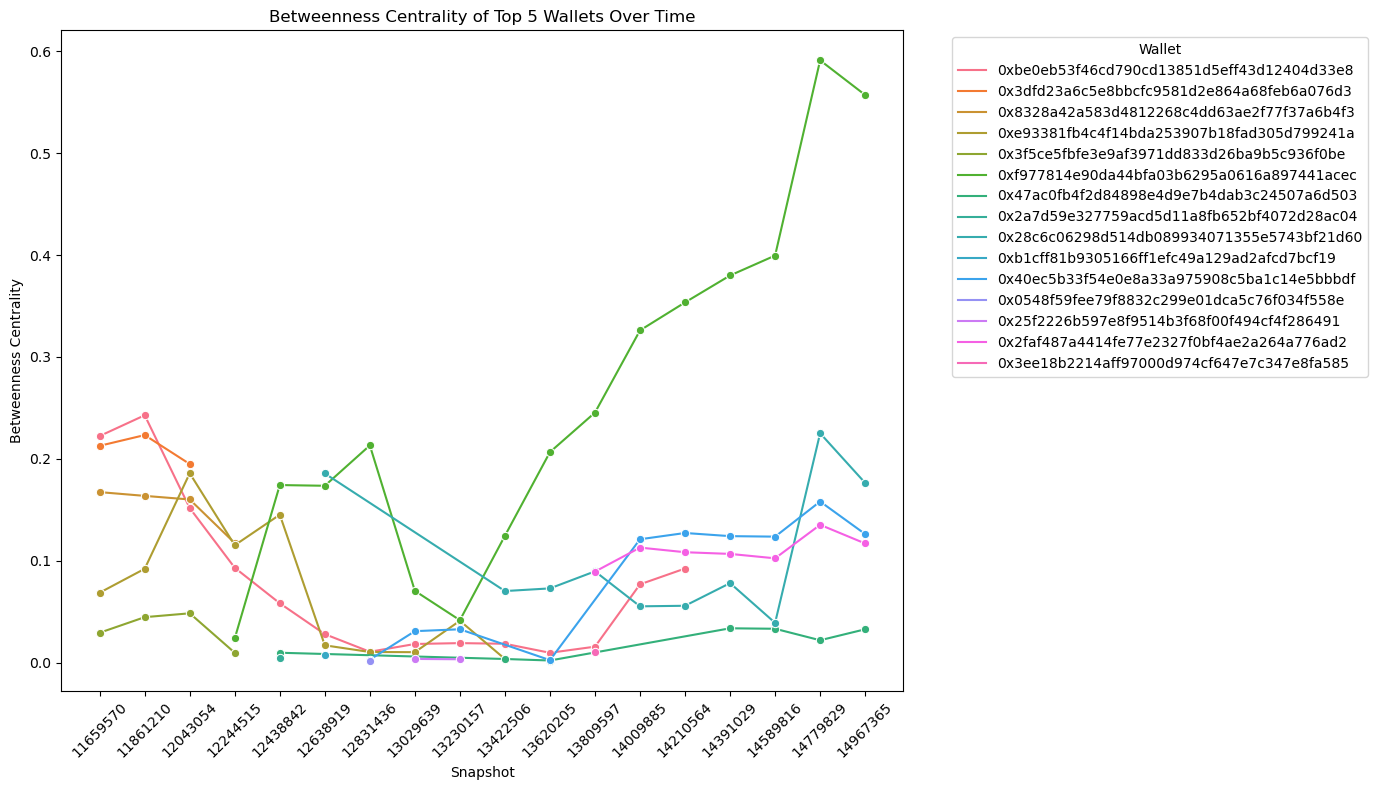

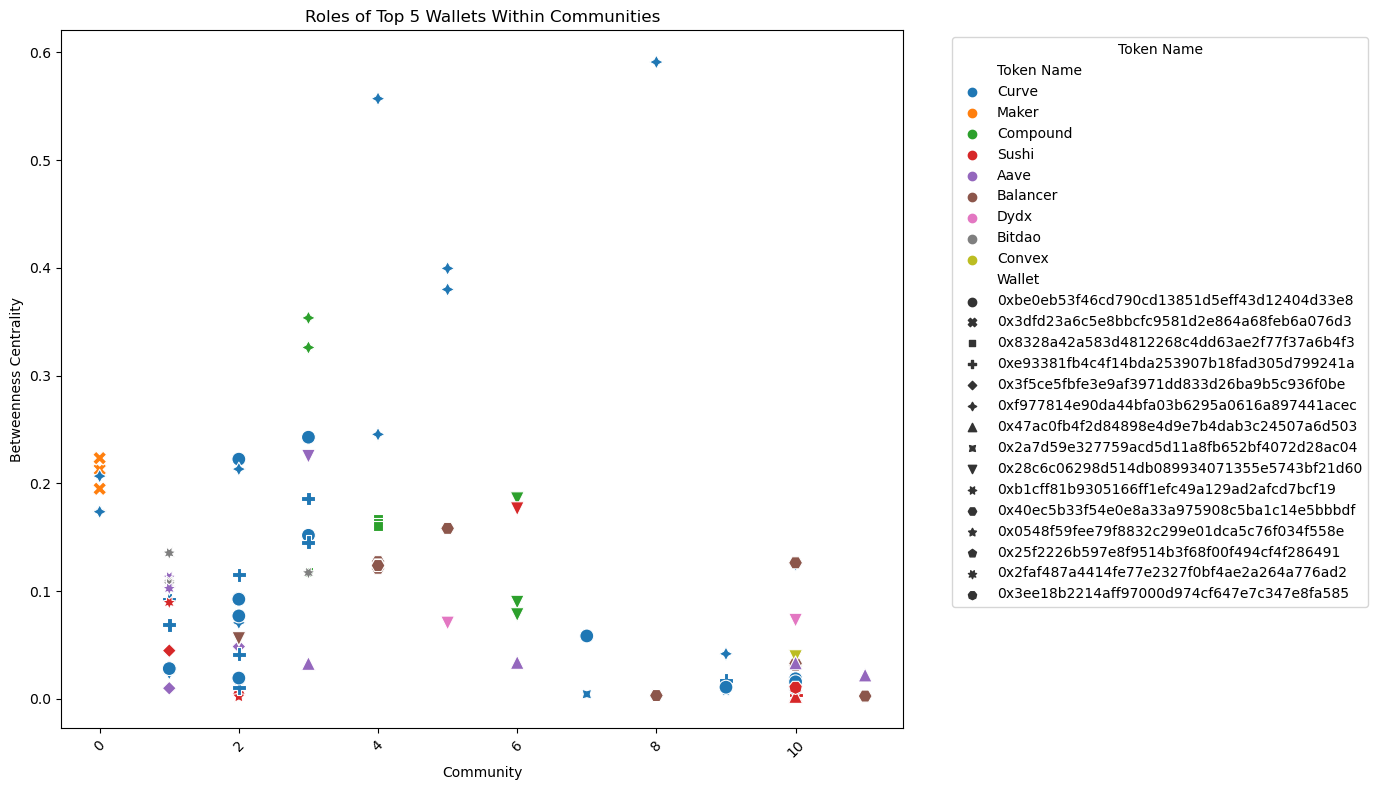

In [111]:
import os
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
from collections import defaultdict

def track_top_central_wallets_over_time(graph_directory, token_info_path, top_n=5):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    central_wallets_data = []

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)
            nx.set_node_attributes(G, partition, 'community')

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Identify the top N nodes (wallets) with the highest betweenness centrality
            top_wallets = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:top_n]

            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')

            # Store the top N wallets' data
            for node, centrality_value in top_wallets:
                token_address = G.nodes[node].get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')
                community = G.nodes[node]['community']
                central_wallets_data.append({
                    'Snapshot': snapshot_time,
                    'Wallet': node,
                    'Betweenness Centrality': centrality_value,
                    'Token Name': token_name,
                    'Community': community
                })

    return pd.DataFrame(central_wallets_data)

def visualize_top_central_wallets_over_time(central_wallets_df):
    # Limit to the 5 most influential wallets in each snapshot
    limited_central_wallets_df = central_wallets_df.groupby('Snapshot').apply(lambda x: x.nlargest(5, 'Betweenness Centrality')).reset_index(drop=True)

    # Plot the betweenness centrality of the most central wallets over time
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=limited_central_wallets_df, x='Snapshot', y='Betweenness Centrality', hue='Wallet', marker='o')
    plt.title('Betweenness Centrality of Top 5 Wallets Over Time')
    plt.xlabel('Snapshot')
    plt.ylabel('Betweenness Centrality')
    plt.legend(title='Wallet', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Analyze roles within communities
    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=limited_central_wallets_df, x='Community', y='Betweenness Centrality', hue='Token Name', style='Wallet', s=100)
    plt.title('Roles of Top 5 Wallets Within Communities')
    plt.xlabel('Community')
    plt.ylabel('Betweenness Centrality')
    plt.legend(title='Token Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Track the top 5 central wallets over time
central_wallets_df = track_top_central_wallets_over_time(graph_directory, token_info_path, top_n=5)

# Visualize the top 5 central wallets' betweenness centrality over time
visualize_top_central_wallets_over_time(central_wallets_df)



/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_3947/3420700116.py:52: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/Users/liamk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/liamk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/liamk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-li

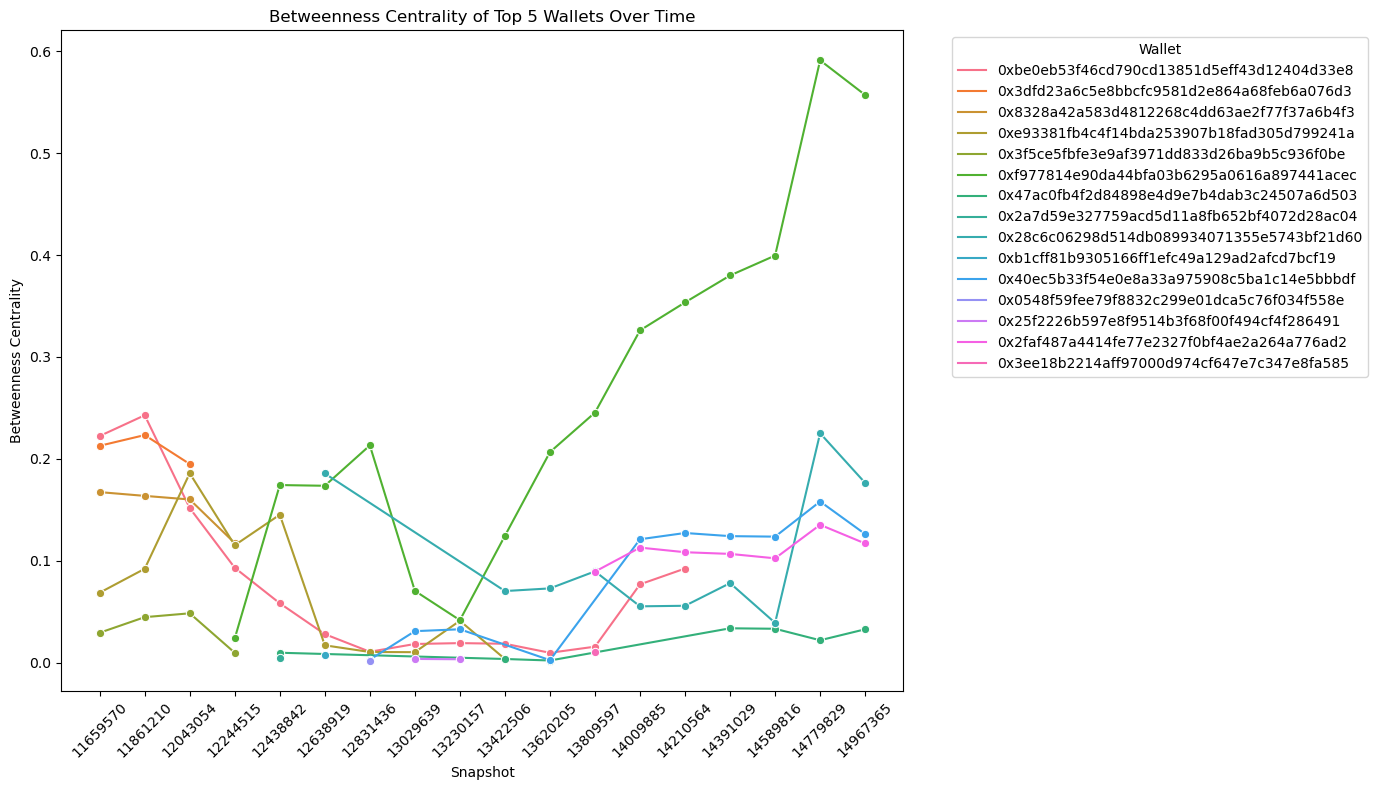

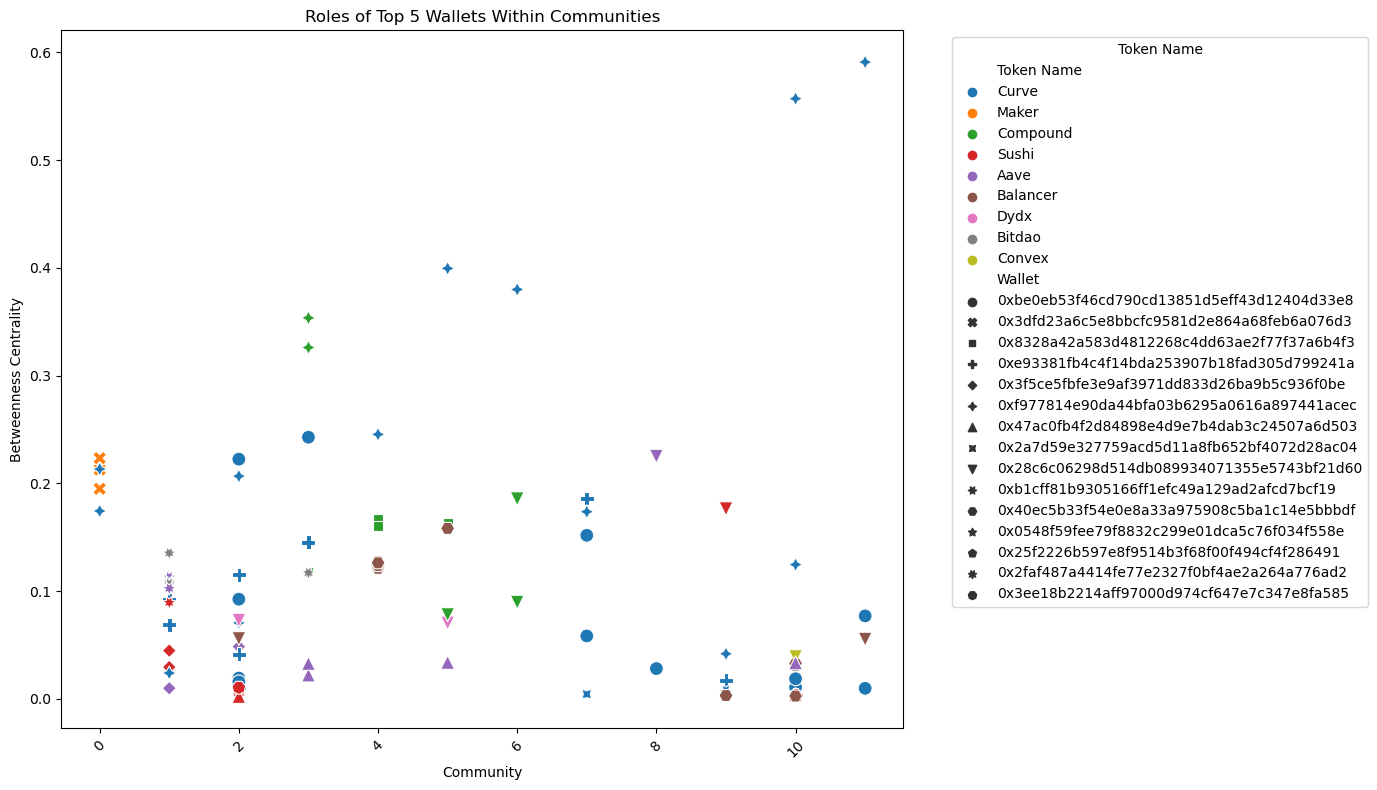

In [112]:
import os
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
from collections import defaultdict

def track_top_central_wallets_over_time(graph_directory, token_info_path, top_n=5):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    central_wallets_data = []

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)
            nx.set_node_attributes(G, partition, 'community')

            # Calculate betweenness centrality
            betweenness = nx.betweenness_centrality(G)

            # Identify the top N nodes (wallets) with the highest betweenness centrality
            top_wallets = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:top_n]

            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')

            # Store the top N wallets' data
            for node, centrality_value in top_wallets:
                token_address = G.nodes[node].get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')
                community = G.nodes[node]['community']
                central_wallets_data.append({
                    'Snapshot': snapshot_time,
                    'Wallet': node,
                    'Betweenness Centrality': centrality_value,
                    'Token Name': token_name,
                    'Community': community
                })

    return pd.DataFrame(central_wallets_data)

def visualize_top_central_wallets_over_time(central_wallets_df):
    # Limit to the 5 most influential wallets in each snapshot
    limited_central_wallets_df = central_wallets_df.groupby('Snapshot').apply(lambda x: x.nlargest(5, 'Betweenness Centrality')).reset_index(drop=True)

    # Plot the betweenness centrality of the most central wallets over time
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=limited_central_wallets_df, x='Snapshot', y='Betweenness Centrality', hue='Wallet', marker='o')
    plt.title('Betweenness Centrality of Top 5 Wallets Over Time')
    plt.xlabel('Snapshot')
    plt.ylabel('Betweenness Centrality')
    plt.legend(title='Wallet', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Analyze roles within communities
    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=limited_central_wallets_df, x='Community', y='Betweenness Centrality', hue='Token Name', style='Wallet', s=100)
    plt.title('Roles of Top 5 Wallets Within Communities')
    plt.xlabel('Community')
    plt.ylabel('Betweenness Centrality')
    plt.legend(title='Token Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Track the top 5 central wallets over time
central_wallets_df = track_top_central_wallets_over_time(graph_directory, token_info_path, top_n=5)

# Visualize the top 5 central wallets' betweenness centrality over time
visualize_top_central_wallets_over_time(central_wallets_df)


# Community evolution

# Growth

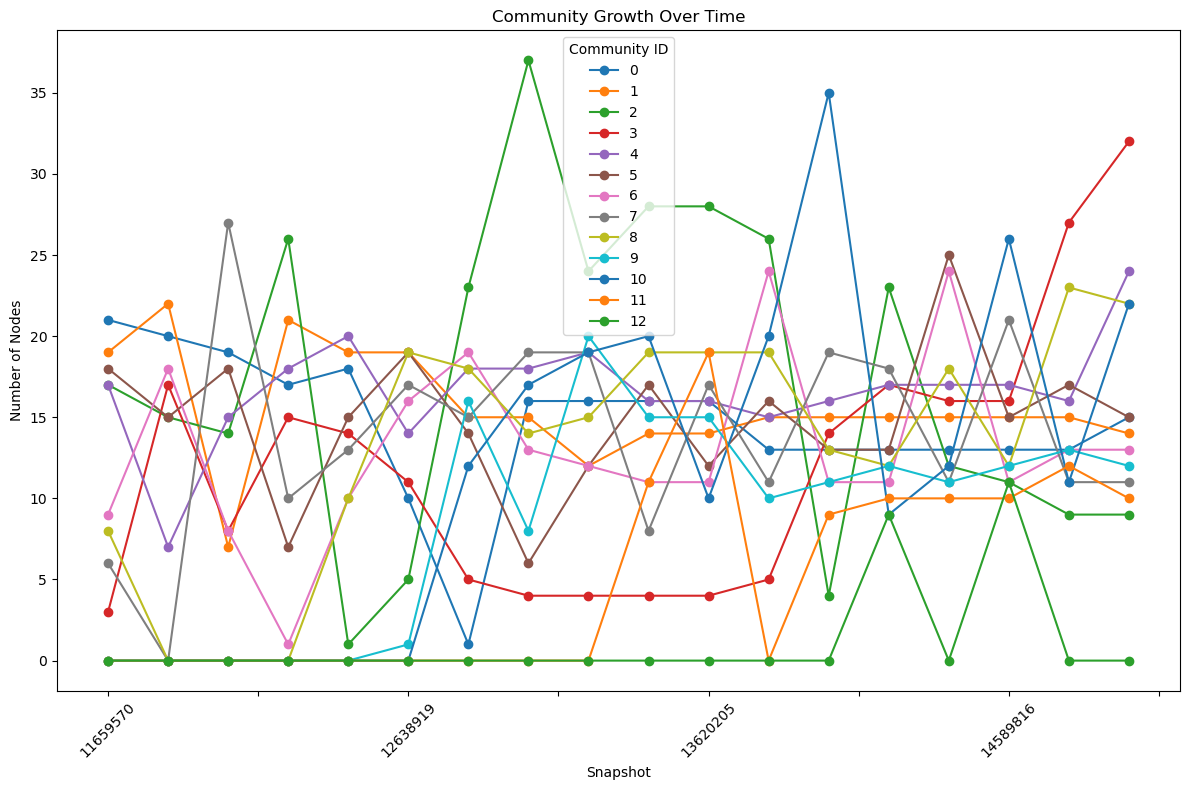

In [113]:
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from collections import defaultdict

def track_community_growth_over_time(graph_directory):
    community_growth = defaultdict(lambda: defaultdict(int))

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Count the number of nodes in each community
            community_sizes = defaultdict(int)
            for node, comm in partition.items():
                community_sizes[comm] += 1

            # Store the sizes of each community for this snapshot
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for comm, size in community_sizes.items():
                community_growth[comm][snapshot_time] = size

    # Convert the community growth data to a DataFrame for easier analysis
    community_growth_df = pd.DataFrame(community_growth).fillna(0).sort_index(axis=1)
    return community_growth_df

def visualize_community_growth(community_growth_df):
    # Plot the community growth over time
    community_growth_df.plot(figsize=(12, 8), marker='o')
    plt.title('Community Growth Over Time')
    plt.xlabel('Snapshot')
    plt.ylabel('Number of Nodes')
    plt.legend(title='Community ID')
    plt.xticks(rotation=45)  # Corrected line
    plt.tight_layout()
    plt.show()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')

# Track the community growth over time
community_growth_df = track_community_growth_over_time(graph_directory)

# Visualize the community growth over time
visualize_community_growth(community_growth_df)


# Splits

In [114]:
import os
import networkx as nx
import community as community_louvain
from os.path import join
from collections import defaultdict

def track_community_membership_over_time(graph_directory):
    community_membership = defaultdict(lambda: defaultdict(set))

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Track the nodes in each community for this snapshot
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for node, comm in partition.items():
                community_membership[snapshot_time][comm].add(node)

    return community_membership

def identify_community_splits(community_membership):
    community_splits = defaultdict(list)
    snapshots = sorted(community_membership.keys())

    # Compare consecutive snapshots
    for i in range(1, len(snapshots)):
        previous_snapshot = snapshots[i - 1]
        current_snapshot = snapshots[i]

        previous_communities = community_membership[previous_snapshot]
        current_communities = community_membership[current_snapshot]

        for prev_comm, prev_nodes in previous_communities.items():
            overlapping_communities = []

            for curr_comm, curr_nodes in current_communities.items():
                # Find the intersection of nodes between the previous community and current communities
                intersection = prev_nodes.intersection(curr_nodes)
                if intersection:
                    overlapping_communities.append((curr_comm, len(intersection)))

            # If the previous community's nodes split into multiple current communities
            if len(overlapping_communities) > 1:
                community_splits[previous_snapshot].append({
                    'Previous Community': prev_comm,
                    'Split Into': sorted(overlapping_communities, key=lambda x: x[1], reverse=True)
                })

    return community_splits

def print_community_splits(community_splits):
    print("Community Splits Detected Over Time:")
    for snapshot, splits in community_splits.items():
        print(f"Snapshot: {snapshot}")
        for split_info in splits:
            prev_comm = split_info['Previous Community']
            print(f"  Community {prev_comm} split into:")
            for curr_comm, intersection_size in split_info['Split Into']:
                print(f"    - Community {curr_comm} with {intersection_size} shared nodes")
        print()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')

# Track community membership over time
community_membership = track_community_membership_over_time(graph_directory)

# Identify community splits over time
community_splits = identify_community_splits(community_membership)

# Print the community splits
print_community_splits(community_splits)


Community Splits Detected Over Time:
Snapshot: 11659570
  Community 1 split into:
    - Community 2 with 16 shared nodes
    - Community 1 with 1 shared nodes

Snapshot: 11861210
  Community 2 split into:
    - Community 2 with 10 shared nodes
    - Community 1 with 7 shared nodes
    - Community 3 with 1 shared nodes
  Community 1 split into:
    - Community 3 with 9 shared nodes
    - Community 6 with 5 shared nodes

Snapshot: 12043054
  Community 0 split into:
    - Community 0 with 17 shared nodes
    - Community 1 with 1 shared nodes
  Community 3 split into:
    - Community 8 with 17 shared nodes
    - Community 6 with 8 shared nodes
    - Community 1 with 2 shared nodes

Snapshot: 12244515
  Community 1 split into:
    - Community 1 with 16 shared nodes
    - Community 0 with 1 shared nodes
    - Community 3 with 1 shared nodes
  Community 8 split into:
    - Community 3 with 13 shared nodes
    - Community 0 with 2 shared nodes
    - Community 7 with 1 shared nodes

Snapshot: 1

In [115]:
import os
import networkx as nx
import community as community_louvain
from os.path import join
from collections import defaultdict

def track_community_membership_over_time(graph_directory):
    community_membership = defaultdict(lambda: defaultdict(set))

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Track the nodes in each community for this snapshot
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for node, comm in partition.items():
                community_membership[snapshot_time][comm].add(node)

    return community_membership

def identify_community_splits_and_deaths(community_membership):
    community_splits = defaultdict(list)
    community_deaths = defaultdict(list)
    snapshots = sorted(community_membership.keys())

    # Compare consecutive snapshots
    for i in range(1, len(snapshots)):
        previous_snapshot = snapshots[i - 1]
        current_snapshot = snapshots[i]

        previous_communities = community_membership[previous_snapshot]
        current_communities = community_membership[current_snapshot]

        for prev_comm, prev_nodes in previous_communities.items():
            overlapping_communities = []

            for curr_comm, curr_nodes in current_communities.items():
                # Find the intersection of nodes between the previous community and current communities
                intersection = prev_nodes.intersection(curr_nodes)
                if intersection:
                    overlapping_communities.append((curr_comm, len(intersection)))

            # If the previous community's nodes split into multiple current communities
            if len(overlapping_communities) > 1:
                community_splits[previous_snapshot].append({
                    'Previous Community': prev_comm,
                    'Split Into': sorted(overlapping_communities, key=lambda x: x[1], reverse=True)
                })
            # If the previous community has no overlap with any current communities, it "dies"
            elif len(overlapping_communities) == 0:
                community_deaths[previous_snapshot].append(prev_comm)

    return community_splits, community_deaths

def print_community_splits_and_deaths(community_splits, community_deaths):
    print("Community Splits Detected Over Time:")
    for snapshot, splits in community_splits.items():
        print(f"Snapshot: {snapshot}")
        for split_info in splits:
            prev_comm = split_info['Previous Community']
            print(f"  Community {prev_comm} split into:")
            for curr_comm, intersection_size in split_info['Split Into']:
                print(f"    - Community {curr_comm} with {intersection_size} shared nodes")
        print()
    
    print("Community Deaths Detected Over Time:")
    for snapshot, deaths in community_deaths.items():
        if deaths:
            print(f"Snapshot: {snapshot}")
            for dead_comm in deaths:
                print(f"  Community {dead_comm} ceased to exist in the next snapshot")
        print()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')

# Track community membership over time
community_membership = track_community_membership_over_time(graph_directory)

# Identify community splits and deaths over time
community_splits, community_deaths = identify_community_splits_and_deaths(community_membership)

# Print the community splits and deaths
print_community_splits_and_deaths(community_splits, community_deaths)


Community Splits Detected Over Time:
Snapshot: 11659570
  Community 1 split into:
    - Community 1 with 16 shared nodes
    - Community 2 with 1 shared nodes

Snapshot: 11861210
  Community 1 split into:
    - Community 2 with 10 shared nodes
    - Community 1 with 7 shared nodes
    - Community 3 with 1 shared nodes
  Community 2 split into:
    - Community 3 with 9 shared nodes
    - Community 6 with 5 shared nodes

Snapshot: 12043054
  Community 0 split into:
    - Community 0 with 17 shared nodes
    - Community 1 with 1 shared nodes
  Community 3 split into:
    - Community 2 with 18 shared nodes
    - Community 6 with 8 shared nodes
    - Community 1 with 1 shared nodes

Snapshot: 12244515
  Community 1 split into:
    - Community 1 with 16 shared nodes
    - Community 0 with 1 shared nodes
  Community 2 split into:
    - Community 3 with 14 shared nodes
    - Community 6 with 7 shared nodes
    - Community 0 with 2 shared nodes
    - Community 7 with 1 shared nodes

Snapshot: 1

In [110]:
import os
import networkx as nx
import community as community_louvain
from os.path import join
from collections import defaultdict
import plotly.graph_objects as go

def track_community_membership_over_time(graph_directory):
    community_membership = defaultdict(lambda: defaultdict(set))

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Track the nodes in each community for this snapshot
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for node, comm in partition.items():
                community_membership[snapshot_time][comm].add(node)

    return community_membership

def identify_community_splits_and_deaths(community_membership):
    community_splits = defaultdict(list)
    community_deaths = defaultdict(list)
    snapshots = sorted(community_membership.keys())

    for i in range(1, len(snapshots)):
        previous_snapshot = snapshots[i - 1]
        current_snapshot = snapshots[i]

        previous_communities = community_membership[previous_snapshot]
        current_communities = community_membership[current_snapshot]

        for prev_comm, prev_nodes in previous_communities.items():
            overlapping_communities = []

            for curr_comm, curr_nodes in current_communities.items():
                intersection = prev_nodes.intersection(curr_nodes)
                if intersection:
                    overlapping_communities.append((curr_comm, len(intersection)))

            if len(overlapping_communities) > 1:
                community_splits[previous_snapshot].append({
                    'Previous Community': prev_comm,
                    'Split Into': sorted(overlapping_communities, key=lambda x: x[1], reverse=True)
                })
            elif len(overlapping_communities) == 0:
                community_deaths[previous_snapshot].append(prev_comm)

    return community_splits, community_deaths

def create_sankey_diagram_for_splits_and_deaths(community_splits, community_deaths):
    source = []
    target = []
    value = []
    labels = {}
    label_list = []

    def add_label(snapshot_comm):
        if snapshot_comm not in labels:
            labels[snapshot_comm] = len(labels)
            label_list.append(snapshot_comm)
        return labels[snapshot_comm]

    # Process splits
    for snapshot, splits in community_splits.items():
        for split_info in splits:
            prev_comm = split_info['Previous Community']
            prev_label = add_label(f"{snapshot}_Comm_{prev_comm}")
            for curr_comm, intersection_size in split_info['Split Into']:
                curr_label = add_label(f"Next_Comm_{curr_comm}")
                source.append(prev_label)
                target.append(curr_label)
                value.append(intersection_size)

    # Process deaths
    for snapshot, deaths in community_deaths.items():
        for dead_comm in deaths:
            dead_label = add_label(f"{snapshot}_Comm_{dead_comm}")
            source.append(dead_label)
            target.append(add_label("DEATH"))
            value.append(1)

    # Create the Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=label_list,
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
        )
    ))

    fig.update_layout(title_text="Community Splits and Deaths Over Time", font_size=10)
    fig.show()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')

# Track community membership over time
community_membership = track_community_membership_over_time(graph_directory)

# Identify community splits and deaths over time
community_splits, community_deaths = identify_community_splits_and_deaths(community_membership)

# Create a Sankey diagram to visualize the splits and deaths
create_sankey_diagram_for_splits_and_deaths(community_splits, community_deaths)


In [116]:
import os
import networkx as nx
import community as community_louvain
from os.path import join
from collections import defaultdict
import plotly.graph_objects as go
import pandas as pd

def generate_snapshot_dates():
    """Generate monthly snapshot dates from June 2021 to December 2022."""
    return pd.date_range(start="2021-06-01", end="2022-12-01", freq='MS').strftime("%Y-%m").tolist()

def track_community_membership_over_time(graph_directory, snapshot_dates):
    community_membership = defaultdict(lambda: defaultdict(set))

    # Process each graph file in the directory
    for i, filename in enumerate(sorted(os.listdir(graph_directory))):  # Ensure files are processed in order
        if filename.endswith('.graphml') and i < len(snapshot_dates):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Track the nodes in each community for this snapshot
            snapshot_time = snapshot_dates[i]
            for node, comm in partition.items():
                community_membership[snapshot_time][comm].add(node)

    return community_membership

def identify_community_splits_and_deaths(community_membership):
    community_splits = defaultdict(list)
    community_deaths = defaultdict(list)
    snapshots = sorted(community_membership.keys())

    for i in range(1, len(snapshots)):
        previous_snapshot = snapshots[i - 1]
        current_snapshot = snapshots[i]

        previous_communities = community_membership[previous_snapshot]
        current_communities = community_membership[current_snapshot]

        for prev_comm, prev_nodes in previous_communities.items():
            overlapping_communities = []

            for curr_comm, curr_nodes in current_communities.items():
                intersection = prev_nodes.intersection(curr_nodes)
                if intersection:
                    overlapping_communities.append((curr_comm, len(intersection)))

            if len(overlapping_communities) > 1:
                community_splits[previous_snapshot].append({
                    'Previous Community': prev_comm,
                    'Split Into': sorted(overlapping_communities, key=lambda x: x[1], reverse=True)
                })
            elif len(overlapping_communities) == 0:
                community_deaths[previous_snapshot].append(prev_comm)

    return community_splits, community_deaths

def create_sankey_diagram_for_splits_and_deaths(community_splits, community_deaths):
    source = []
    target = []
    value = []
    labels = {}
    label_list = []

    def add_label(snapshot_comm):
        if snapshot_comm not in labels:
            labels[snapshot_comm] = len(labels)
            label_list.append(snapshot_comm)
        return labels[snapshot_comm]

    # Process splits
    for snapshot, splits in community_splits.items():
        for split_info in splits:
            prev_comm = split_info['Previous Community']
            prev_label = add_label(f"{snapshot}_Comm_{prev_comm}")
            for curr_comm, intersection_size in split_info['Split Into']:
                curr_label = add_label(f"Next_Comm_{curr_comm}")
                source.append(prev_label)
                target.append(curr_label)
                value.append(intersection_size)

    # Process deaths
    for snapshot, deaths in community_deaths.items():
        for dead_comm in deaths:
            dead_label = add_label(f"{snapshot}_Comm_{dead_comm}")
            source.append(dead_label)
            target.append(add_label("DEATH"))
            value.append(1)

    # Create the Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=label_list,
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
        )
    ))

    fig.update_layout(title_text="Community Splits and Deaths Over Time (June 2021 - December 2022)", font_size=10)
    fig.show()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')

# Generate snapshot dates for the time period from June 2021 to December 2022
snapshot_dates = generate_snapshot_dates()

# Track community membership over time
community_membership = track_community_membership_over_time(graph_directory, snapshot_dates)

# Identify community splits and deaths over time
community_splits, community_deaths = identify_community_splits_and_deaths(community_membership)

# Create a Sankey diagram to visualize the splits and deaths
create_sankey_diagram_for_splits_and_deaths(community_splits, community_deaths)


# Merges

In [117]:
import os
import networkx as nx
from os.path import join
from collections import defaultdict

def track_community_membership_over_time(graph_directory):
    community_membership = defaultdict(lambda: defaultdict(set))

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Track the nodes in each community for this snapshot
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for node, comm in partition.items():
                community_membership[snapshot_time][comm].add(node)

    return community_membership

def identify_community_merges(community_membership):
    community_merges = defaultdict(list)
    snapshots = sorted(community_membership.keys())

    # Compare consecutive snapshots
    for i in range(1, len(snapshots)):
        previous_snapshot = snapshots[i - 1]
        current_snapshot = snapshots[i]

        previous_communities = community_membership[previous_snapshot]
        current_communities = community_membership[current_snapshot]

        for curr_comm, curr_nodes in current_communities.items():
            contributing_communities = []

            for prev_comm, prev_nodes in previous_communities.items():
                # Find the intersection of nodes between the current community and previous communities
                intersection = curr_nodes.intersection(prev_nodes)
                if intersection:
                    contributing_communities.append((prev_comm, len(intersection)))

            # If the current community is formed by nodes from multiple previous communities
            if len(contributing_communities) > 1:
                community_merges[current_snapshot].append({
                    'Current Community': curr_comm,
                    'Merged From': sorted(contributing_communities, key=lambda x: x[1], reverse=True)
                })

    return community_merges

def print_community_merges(community_merges):
    print("Community Merges Detected Over Time:")
    for snapshot, merges in community_merges.items():
        print(f"Snapshot: {snapshot}")
        for merge_info in merges:
            curr_comm = merge_info['Current Community']
            print(f"  Community {curr_comm} was formed by merging:")
            for prev_comm, intersection_size in merge_info['Merged From']:
                print(f"    - Community {prev_comm} with {intersection_size} shared nodes")
        print()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')

# Track community membership over time
community_membership = track_community_membership_over_time(graph_directory)

# Identify community merges over time
community_merges = identify_community_merges(community_membership)

# Print the community merges
print_community_merges(community_merges)


Community Merges Detected Over Time:
Snapshot: 11861210
  Community 4 was formed by merging:
    - Community 2 with 14 shared nodes
    - Community 3 with 3 shared nodes
  Community 2 was formed by merging:
    - Community 8 with 8 shared nodes
    - Community 7 with 4 shared nodes
    - Community 1 with 1 shared nodes

Snapshot: 12043054
  Community 3 was formed by merging:
    - Community 4 with 10 shared nodes
    - Community 2 with 9 shared nodes
    - Community 1 with 1 shared nodes

Snapshot: 12244515
  Community 1 was formed by merging:
    - Community 2 with 11 shared nodes
    - Community 1 with 5 shared nodes
    - Community 0 with 1 shared nodes
    - Community 3 with 1 shared nodes
  Community 5 was formed by merging:
    - Community 3 with 18 shared nodes
    - Community 6 with 6 shared nodes

Snapshot: 12438842
  Community 0 was formed by merging:
    - Community 0 with 14 shared nodes
    - Community 5 with 2 shared nodes
    - Community 1 with 1 shared nodes
  Community

In [118]:
import os
import networkx as nx
import community as community_louvain
from os.path import join
from collections import defaultdict
import plotly.graph_objects as go
import pandas as pd

# Mapping of snapshots to dates (example mapping)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

def track_community_membership_over_time(graph_directory):
    community_membership = defaultdict(lambda: defaultdict(set))

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Track the nodes in each community for this snapshot
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for node, comm in partition.items():
                community_membership[snapshot_time][comm].add(node)

    return community_membership

def identify_community_merges(community_membership):
    community_merges = defaultdict(list)
    snapshots = sorted(community_membership.keys())

    # Compare consecutive snapshots
    for i in range(1, len(snapshots)):
        previous_snapshot = snapshots[i - 1]
        current_snapshot = snapshots[i]

        previous_communities = community_membership[previous_snapshot]
        current_communities = community_membership[current_snapshot]

        for curr_comm, curr_nodes in current_communities.items():
            overlapping_communities = []

            for prev_comm, prev_nodes in previous_communities.items():
                # Find the intersection of nodes between current community and previous communities
                intersection = curr_nodes.intersection(prev_nodes)
                if intersection:
                    overlapping_communities.append((prev_comm, len(intersection)))

            # If multiple previous communities merged into the current community
            if len(overlapping_communities) > 1:
                community_merges[current_snapshot].append({
                    'Current Community': curr_comm,
                    'Merged From': sorted(overlapping_communities, key=lambda x: x[1], reverse=True)
                })

    return community_merges

def print_community_merges(community_merges):
    print("Community Merges Detected Over Time:")
    for snapshot, merges in community_merges.items():
        print(f"Snapshot: {snapshot_dates[snapshot]} ({snapshot})")
        for merge_info in merges:
            curr_comm = merge_info['Current Community']
            print(f"  Community {curr_comm} formed from the merge of:")
            for prev_comm, intersection_size in merge_info['Merged From']:
                print(f"    - Community {prev_comm} with {intersection_size} shared nodes")
        print()

def visualize_community_merges(community_merges):
    merge_edges = []
    labels = []
    label_index = {}
    index = 0

    for snapshot, merges in community_merges.items():
        for merge_info in merges:
            curr_comm = merge_info['Current Community']
            for prev_comm, intersection_size in merge_info['Merged From']:
                source_label = f"{snapshot_dates[snapshot]}: Community {prev_comm}"
                target_label = f"{snapshot_dates[snapshot]}: Community {curr_comm}"

                if source_label not in label_index:
                    label_index[source_label] = index
                    labels.append(source_label)
                    index += 1
                if target_label not in label_index:
                    label_index[target_label] = index
                    labels.append(target_label)
                    index += 1

                merge_edges.append({
                    'Source': label_index[source_label],
                    'Target': label_index[target_label],
                    'Value': intersection_size
                })

    # Create a DataFrame for better handling and visualization
    merge_df = pd.DataFrame(merge_edges)

    # Create a Sankey diagram for community merges
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels,
        ),
        link=dict(
            source=merge_df['Source'],
            target=merge_df['Target'],
            value=merge_df['Value']
        )
    ))

    fig.update_layout(title_text="Community Merges Over Time", font_size=10)
    fig.show()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')

# Track community membership over time
community_membership = track_community_membership_over_time(graph_directory)

# Identify community merges over time
community_merges = identify_community_merges(community_membership)

# Print the community merges
print_community_merges(community_merges)

# Visualize community merges over time
visualize_community_merges(community_merges)



Community Merges Detected Over Time:
Snapshot: 2021-07 (11861210)
  Community 3 formed from the merge of:
    - Community 1 with 14 shared nodes
    - Community 5 with 3 shared nodes
  Community 2 formed from the merge of:
    - Community 6 with 8 shared nodes
    - Community 4 with 4 shared nodes
    - Community 7 with 1 shared nodes

Snapshot: 2021-08 (12043054)
  Community 3 formed from the merge of:
    - Community 3 with 10 shared nodes
    - Community 2 with 9 shared nodes
    - Community 1 with 1 shared nodes

Snapshot: 2021-09 (12244515)
  Community 1 formed from the merge of:
    - Community 2 with 11 shared nodes
    - Community 1 with 5 shared nodes
    - Community 0 with 1 shared nodes
    - Community 3 with 1 shared nodes
  Community 5 formed from the merge of:
    - Community 3 with 18 shared nodes
    - Community 6 with 6 shared nodes

Snapshot: 2021-10 (12438842)
  Community 0 formed from the merge of:
    - Community 0 with 14 shared nodes
    - Community 5 with 2 shar

In [119]:
import os
import networkx as nx
import community as community_louvain
from os.path import join
from collections import defaultdict
import plotly.graph_objects as go
import pandas as pd

# Mapping of snapshots to dates (example mapping)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

def track_community_membership_over_time(graph_directory):
    community_membership = defaultdict(lambda: defaultdict(set))

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Track the nodes in each community for this snapshot
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for node, comm in partition.items():
                community_membership[snapshot_time][comm].add(node)

    return community_membership

def identify_community_merges(community_membership):
    community_merges = defaultdict(list)
    snapshots = sorted(community_membership.keys())

    # Compare consecutive snapshots
    for i in range(1, len(snapshots)):
        previous_snapshot = snapshots[i - 1]
        current_snapshot = snapshots[i]

        previous_communities = community_membership[previous_snapshot]
        current_communities = community_membership[current_snapshot]

        for curr_comm, curr_nodes in current_communities.items():
            overlapping_communities = []

            for prev_comm, prev_nodes in previous_communities.items():
                # Find the intersection of nodes between current community and previous communities
                intersection = curr_nodes.intersection(prev_nodes)
                if intersection:
                    overlapping_communities.append((prev_comm, len(intersection)))

            # If multiple previous communities merged into the current community
            if len(overlapping_communities) > 1:
                community_merges[current_snapshot].append({
                    'Current Community': curr_comm,
                    'Merged From': sorted(overlapping_communities, key=lambda x: x[1], reverse=True)
                })

    return community_merges

def create_sankey_diagram_for_merges(community_merges):
    merge_edges = []
    labels = []
    label_index = {}
    index = 0

    for snapshot, merges in community_merges.items():
        for merge_info in merges:
            curr_comm = merge_info['Current Community']
            for prev_comm, intersection_size in merge_info['Merged From']:
                source_label = f"{snapshot_dates[snapshot]}: Community {prev_comm}"
                target_label = f"{snapshot_dates[snapshot]}: Community {curr_comm}"

                if source_label not in label_index:
                    label_index[source_label] = index
                    labels.append(source_label)
                    index += 1
                if target_label not in label_index:
                    label_index[target_label] = index
                    labels.append(target_label)
                    index += 1

                merge_edges.append({
                    'Source': label_index[source_label],
                    'Target': label_index[target_label],
                    'Value': intersection_size
                })

    # Create a DataFrame for better handling and visualization
    merge_df = pd.DataFrame(merge_edges)

    # Create a larger Sankey diagram for community merges
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=30,  # Increase the padding between nodes
            thickness=30,  # Increase the node thickness
            line=dict(color="black", width=0.5),
            label=labels,
            color="blue"
        ),
        link=dict(
            source=merge_df['Source'],
            target=merge_df['Target'],
            value=merge_df['Value']
        )
    ))

    fig.update_layout(
        title_text="Community Merges Over Time",
        font_size=12,
        width=1500,  # Increase the width of the figure
        height=900   # Increase the height of the figure
    )
    fig.show()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')

# Track community membership over time
community_membership = track_community_membership_over_time(graph_directory)

# Identify community merges over time
community_merges = identify_community_merges(community_membership)

# Create a Sankey diagram to visualize the community merges over time
create_sankey_diagram_for_merges(community_merges)


In [120]:
import os
import networkx as nx
import community as community_louvain
from os.path import join
from collections import defaultdict
import plotly.graph_objects as go

# Mapping of snapshots to dates (example mapping)
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

def track_community_membership_over_time(graph_directory):
    community_membership = defaultdict(lambda: defaultdict(set))

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Track the nodes in each community for this snapshot
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for node, comm in partition.items():
                community_membership[snapshot_time][comm].add(node)

    return community_membership

def identify_community_merges(community_membership):
    community_merges = []
    snapshots = sorted(community_membership.keys())

    # Compare consecutive snapshots
    for i in range(1, len(snapshots)):
        previous_snapshot = snapshots[i - 1]
        current_snapshot = snapshots[i]

        previous_communities = community_membership[previous_snapshot]
        current_communities = community_membership[current_snapshot]

        for curr_comm, curr_nodes in current_communities.items():
            overlapping_communities = []

            for prev_comm, prev_nodes in previous_communities.items():
                # Find the intersection of nodes between previous and current communities
                intersection = curr_nodes.intersection(prev_nodes)
                if intersection:
                    overlapping_communities.append((prev_comm, len(intersection)))

            # Record merges (only if more than one previous community merges into a current one)
            if len(overlapping_communities) > 1:
                community_merges.append({
                    'Current Community': curr_comm,
                    'Merged From': sorted(overlapping_communities, key=lambda x: x[1], reverse=True),
                    'Current Snapshot': current_snapshot,
                    'Previous Snapshot': previous_snapshot
                })

    return community_merges

def create_sankey_diagram_for_merges(community_merges):
    source = []
    target = []
    value = []
    labels = {}
    label_list = []

    # Prepare data for the Sankey diagram
    for merge_info in community_merges:
        curr_snapshot_label = snapshot_dates[merge_info['Current Snapshot']]
        prev_snapshot_label = snapshot_dates[merge_info['Previous Snapshot']]

        curr_comm_label = f"{curr_snapshot_label}: Community {merge_info['Current Community']}"

        for prev_comm, intersection_size in merge_info['Merged From']:
            prev_comm_label = f"{prev_snapshot_label}: Community {prev_comm}"

            if prev_comm_label not in labels:
                labels[prev_comm_label] = len(labels)
                label_list.append(prev_comm_label)

            if curr_comm_label not in labels:
                labels[curr_comm_label] = len(labels)
                label_list.append(curr_comm_label)

            source.append(labels[prev_comm_label])
            target.append(labels[curr_comm_label])
            value.append(intersection_size)

    # Create Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=30,
            thickness=30,
            line=dict(color="black", width=0.5),
            label=label_list,
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
        )
    ))

    fig.update_layout(
        title_text="Community Merges Over Time",
        font_size=12,
        width=1500,
        height=900
    )
    fig.show()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')

# Track community membership over time
community_membership = track_community_membership_over_time(graph_directory)

# Identify community merges over time
community_merges = identify_community_merges(community_membership)

# Create a Sankey diagram to visualize the community merges over time
create_sankey_diagram_for_merges(community_merges)


In [82]:
import os
import networkx as nx
import community as community_louvain
from os.path import join
from collections import defaultdict
import plotly.graph_objects as go

def track_community_membership_over_time(graph_directory):
    community_membership = defaultdict(lambda: defaultdict(set))

    # Process each graph file in the directory
    for filename in sorted(os.listdir(graph_directory)):  # Ensure files are processed in order
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)

            # Track the nodes in each community for this snapshot
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for node, comm in partition.items():
                community_membership[snapshot_time][comm].add(node)

    return community_membership

def identify_splits_and_merges(community_membership):
    splits_and_merges = []
    snapshots = sorted(community_membership.keys())

    # Compare consecutive snapshots
    for i in range(1, len(snapshots)):
        previous_snapshot = snapshots[i - 1]
        current_snapshot = snapshots[i]

        previous_communities = community_membership[previous_snapshot]
        current_communities = community_membership[current_snapshot]

        for prev_comm, prev_nodes in previous_communities.items():
            overlapping_communities = []

            for curr_comm, curr_nodes in current_communities.items():
                # Find the intersection of nodes between previous and current communities
                intersection = prev_nodes.intersection(curr_nodes)
                if intersection:
                    overlapping_communities.append((curr_comm, len(intersection)))

            # Record splits and merges
            if len(overlapping_communities) > 1:
                for curr_comm, intersection_size in overlapping_communities:
                    splits_and_merges.append((f"{previous_snapshot}_{prev_comm}", f"{current_snapshot}_{curr_comm}", intersection_size))
            elif overlapping_communities:
                curr_comm, intersection_size = overlapping_communities[0]
                splits_and_merges.append((f"{previous_snapshot}_{prev_comm}", f"{current_snapshot}_{curr_comm}", intersection_size))

    return splits_and_merges

def create_sankey_diagram(splits_and_merges):
    source = []
    target = []
    value = []
    labels = {}
    label_list = []

    # Prepare data for the Sankey diagram
    for src, tgt, val in splits_and_merges:
        if src not in labels:
            labels[src] = len(labels)
            label_list.append(src)
        if tgt not in labels:
            labels[tgt] = len(labels)
            label_list.append(tgt)
        source.append(labels[src])
        target.append(labels[tgt])
        value.append(val)

    # Create Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=label_list,
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
        )
    ))

    fig.update_layout(title_text="Community Splits and Merges Over Time", font_size=10)
    fig.show()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')

# Track community membership over time
community_membership = track_community_membership_over_time(graph_directory)

# Identify community splits and merges over time
splits_and_merges = identify_splits_and_merges(community_membership)

# Create a Sankey diagram to visualize the splits and merges
create_sankey_diagram(splits_and_merges)
